In [ ]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

# Методы Монте-Карло

В лабораторной [про квадратурные формулы](Integration.ipynb) мы пытались посчитать объем четырехмерного шара
методами трапеций и Симпсона. Абсолютная погрешность этих метод имеет асимптотику $h^d$ при шаге решетки $h\to0$,
где $d$ - порядок метода.
Число точек, в которых должно быть вычислено подинтегральное выражение, изменяется как $h^{-D}$, где $D=4$ - размерность пространства.
Для больших размерностей $D$ это делает использование квадратурных формул почти невозможным.
Существует однако возможность использовать небольшое число случайно выбранных точек для оценки интеграла, вмество построения мелкой решетки.
Этот подход базируется на связи интегралов и средних значений случайных величин:
$$
E_p[f]=\int_{\Omega} f(x)p(x)dx,
$$
где $f$ случайная величина, заданная на множестве $\Omega$ элементарных событий с плотностью распределения $p$,
$E_p[f]$ обозначает среднее значение $f$ на этом распределении.
Если мы имеем возможность генерировать выборку значений $x_k$ случайной величины $X$, отвечающей $p$,
то среднее значение оценивается статистикой:
$$
E_p[f] \approx M_N = \frac{1}{N}\sum_{n=1}^N f(x_n),
$$
что дает нам связь между интегралом и суммой по случайно выбранным точкам.
Методы интегрирования на основе случайных выборок обычно называют методами Монте-Карло.

Среднее арифметическое $M_N$ также является случайной величиной,
дисперсия которой оценивается как
$$
\sigma(M_n)^2 = \frac{\sigma_p(f)^2}{N},
$$
где $\sigma_p(f)^2$ обозначает дисперсию случайной величины $f$.
Согласно этой формуле ошибка оценивания интеграла средним арфиметическим убывает как $N^{-\frac12}$,
что довольно медленно, однако эта скорость не зависит от размерности пространства,
что делает метод Монте-Карло предпочтительным для задач большой размерности.

Для вычисления обьема четырехмерного шара $B=\{x\in\mathbb R^4\colon |x|^2\leq 1\},$
мы возьмем случайную величину $X$ равномерно распределенную на кубе $\Omega=[-1,1]^{\times 4}$.
Воспользуемся очевидными тождествами:
$$\frac{V(B)}{V(\Omega)}=P\{X\in B\}=E[1_B],$$
где $1_B$ - характеристическая функция множества $B$:
$$
1_B(x)=\begin{cases}
1,&x\in B,\\
0,&x\notin B.
\end{cases}
$$

In [ ]:
# Для семплирования разных распределений удобно использовать пакет numpy.random.
# Создадим выборку из N=10000 равномерно распределенных на Omega значений.
N = 100000 # Размер выборки
D = 6 # Размерность пространства
x = np.random.rand(N, D)*2-1
# Найдем значения, попадающие в шар B
is_x_in_B = np.sum(x**2, axis=1)<1
# Посчитаем число попавших в B значений
x_in_B_count = np.sum(is_x_in_B)
# Оцениваем вероятность попасти в шар
p_x_in_B = x_in_B_count / N
# Обьем куба
V_Omega = 2 ** D
# Наконец искомый интеграл равен
V_B_estimated = p_x_in_B * V_Omega
# Аналитическое значение интеграла
V_B_analytic = np.power(np.pi, D/2) / scipy.special.gamma(D/2+1)
print("Exact volume", V_B_analytic)
print("Estimated volume", V_B_estimated)
print("Relative error", np.abs(V_B_estimated-V_B_analytic)/V_B_analytic)


Exact volume 5.167712780049969
Estimated volume 5.1168
Relative error 0.009852091673229079


## Задания:

### 1. Вычислите методом Монте-Карло объемы $D$-мерных шаров радиуса $R=1$ для $D=1\ldots 15$ с выборками размера $N=1\ldots 10^6$.
Постройте график зависимости средней квадратической относительной ошибки объема от $N$ для разных $D$. Оцените асимптотику ошибки при $N\to\infty$.

In [ ]:
from tqdm.notebook import tqdm
from matplotlib import cm

In [ ]:
def monte_carlo_volume(D, N):
    x = np.random.rand(N, D)*2-1
    is_x_in_B = np.sum(x**2, axis=1)<1
    x_in_B_count = np.sum(is_x_in_B)
    p_x_in_B = x_in_B_count / N
    V_Omega = 2 ** D
    V_B_estimated = p_x_in_B * V_Omega
    return V_B_estimated

D_values = np.arange(1, 16)
N_values = np.logspace(0, 6, num=31).astype(int)
errors = np.zeros((len(D_values), len(N_values)))

for i, D in enumerate(tqdm(D_values, desc="Dimensions")):
    V_B_analytic = np.power(np.pi, D/2) / scipy.special.gamma(D/2+1)
    for j, N in enumerate(tqdm(N_values, desc="Sample Sizes", leave=False)):
        trials = 10
        error = 0
        for _ in range(trials):
            error += np.abs(monte_carlo_volume(D, N)-V_B_analytic)/V_B_analytic
        errors[i, j] = error / trials

Dimensions:   0%|          | 0/15 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

<ipython-input-44-59f5201d9658>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greens', len(D_values))


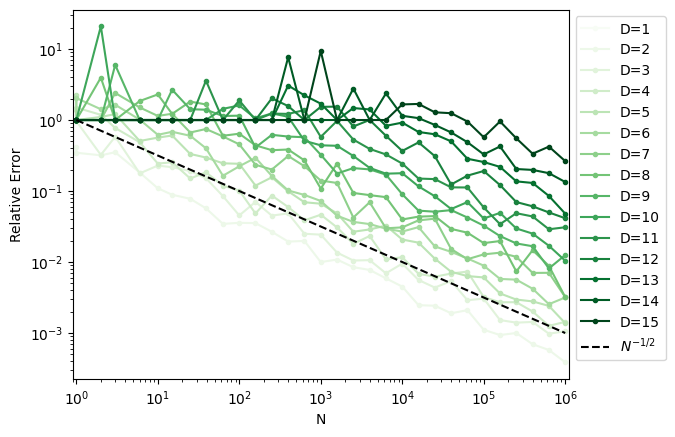

In [ ]:
cmap = cm.get_cmap('Greens', len(D_values))
for i, D in enumerate(D_values):
    color = cmap(i)
    plt.loglog(N_values, errors[i], ".-", label=f'D={D}', color=color)
plt.loglog(N_values, np.power(N_values, -0.5), 'k--', label="$N^{-1/2}$")
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(min(N_values)*0.9, max(N_values)*1.1)
plt.show()

### 2. Теоретически обоснуйте наблюдаемую зависимость средней квадратической ошибки от размера выборки.

Ошибка метода Монте-Карло определяется стандартной ошибкой среднего:
$$\Delta=\sqrt{\frac{p(1−p)}{N}},$$
где $p$ — вероятность попадания точки в шар.

Относительная ошибка:
$$\varepsilon=\frac\Delta p=\sqrt{\frac{(1−p)}{pN}}$$

Для $D=1$ $p=1$, а с увеличением $D$ $p$ уменьшается - $\varepsilon$ увеличивается.

Асимптотика:
При $N\to\infty$, ошибка убывает как $N^{−1/2}$, что подтверждается графиком.

### 3. Как можно оценить предельную ошибку вычисления интеграла методом Монте-Карло?

Предельную ошибку можно оценить через стандартную ошибку $\Delta$.

### 4. Сравните ошибку метода Монте-Карло с результатами лабораторной [про квадратурные формулы](Integration.ipynb). Для каких размерностей $D$ метод Монте-Карло оказывается точнее, чем вычисление через произведение составных формул Симпсона по каждой из координат?

Возьмем код из лабораторной про квадратурные формулы (для четырехмерного гиперкуба) и допишем его для других размерностей:

Dimensions:   0%|          | 0/3 [00:00<?, ?it/s]

D=1, Simpson:   0%|          | 0/10 [00:00<?, ?it/s]

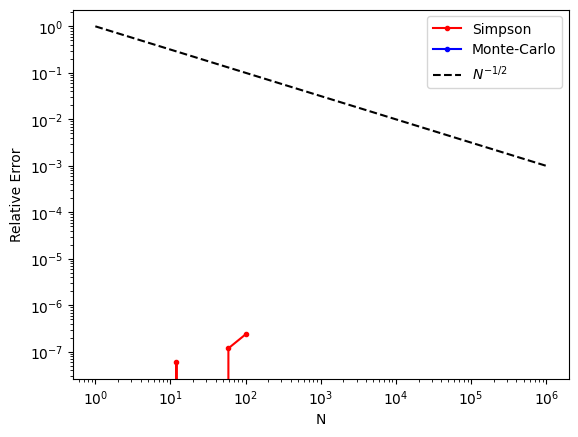

D=2, Simpson:   0%|          | 0/10 [00:00<?, ?it/s]

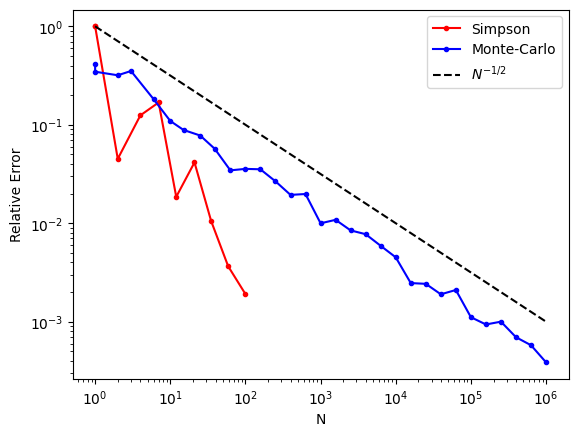

D=3, Simpson:   0%|          | 0/10 [00:00<?, ?it/s]

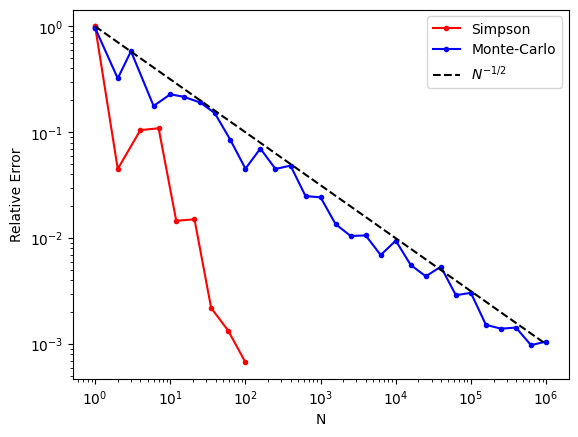

In [ ]:
import psutil

def get_memory_usage():
    return psutil.virtual_memory().percent

def compute_integral(D, M):
    h = 2 / M
    x = np.linspace(-1, 1, M + 1)
    w = np.full(M + 1, h, dtype=np.float32)
    w[0] = w[-1] = h / 2

    W = w.copy()
    for _ in range(D - 1):
        W = np.outer(W, w)
    W = W.reshape([M+1]*D)

    grid = np.meshgrid(*([x] * D), indexing='ij')
    R_sq = np.sum(np.stack([axis**2 for axis in grid], axis=0), axis=0)
    chi = (R_sq <= 1).astype(np.float32)
    return np.sum(W * chi)

D_values1 = np.arange(1, 4)
N_values1 = np.logspace(0, 2, num=10).astype(int)

for i, D in enumerate(tqdm(D_values1, desc="Dimensions")):
    V_B_analytic = np.power(np.pi, D/2) / scipy.special.gamma(D/2 + 1)
    simpson_errors = []

    for j, N in enumerate(tqdm(N_values1, desc=f"D={D}, Simpson")):
        if get_memory_usage() > 70:
            print(f"Memory overflow at D={D}, N={N}! Skipping...")
            simpson_errors.append(np.nan)
            continue

        trials = 5
        error = 0
        valid_trials = 0
        for _ in range(trials):
            integral = compute_integral(D, N)
            if not np.isnan(integral):
                error += np.abs(integral - V_B_analytic) / V_B_analytic
                valid_trials += 1
        if valid_trials > 0:
            simpson_errors.append(error / valid_trials)
        else:
            simpson_errors.append(np.nan)

    plt.figure()
    plt.loglog(N_values1, simpson_errors, 'r.-', label='Simpson')
    plt.loglog(N_values, errors[i], "b.-", label='Monte-Carlo')
    plt.loglog(N_values, np.power(N_values, -0.5), 'k--', label="$N^{-1/2}$")
    plt.xlabel('N')
    plt.ylabel('Relative Error')
    plt.legend()
    plt.show()

При больших размерностях, чем 4, Симпсон просто не посчитался (потребовалось больше оперативной памяти, чем доступно.) При посчитанных $D=1\dots 4$, однако, его точность выше, чем у Монте-Карло.

# Уменьшение ошибки метода Монте-Карло

Предположим мы хотим вычислить интеграл

$$I=\int_{\Omega} f(x)dx,$$

методом Монте-Карло, для этого мы представляем его в виде среднего математического величины $f(x)/p(x)$,
на плотности распределения $p$:

$$
I = E_p[f/p] = \int_{\Omega}\frac{f(x)}{p(x)}p(x)dx.
$$

Пусть $x_n$ выборка случайной величины $X$ с плотностью $p$, тогда
$$
I\approx M_N=\frac{1}{N}\sum_{n=1}^N \frac{f(x_n)}{p(x_n)}.
$$
Дисперсия $M_N$ выражает меру ошибки:
$$
\sigma(M_N)^2 = \frac{1}{N}\sigma_p(f/p)^2=\frac{1}{N}\int_{\Omega} \left(\frac{f(x)}{p(x)}-I\right)^2 p(x)dx.
$$
Можно видеть, что хотя для всех $p$ среднее значение $M_N$ совпадает с искомым интегралом $I$,
величина ошибка существенно зависит от выбора $p$.
Идеальным является выбор $p$ пропорциональным функии $f$, но генерация произвольного распределения само по себе является сложной задачей.
Поэтому на практике желательно выбирать известное распределение, имеющую плотность как можно более близко повторяющую $f$.
Данный метод является вариацией [выборки по значимости](http://ru.wikipedia.org/wiki/Выборка_по_значимости).

Попробуем улучшить точность вычислений объема шара, отталкиваясь от более естественного распределения, чем равномерное на кубе.
Наш предыдущий подход давал точный ответ для $D=1$.
Теперь мы будем опираться на известное нам значение площади круга, и получим метод, дающий точный ответ для $D=2$.
Заметим, что если мы имеем пару случайных величин $\mu$, $\nu$, равномерно распределенных на интервале $[0,1]$,
то мы можем получить случайную точку $(x,y)$, равномерно распределенную на круге $x^2+y^2\leq 1$:
$$
\begin{cases}
x=r\cos\phi,\\
y=r\sin\phi,\\
\end{cases}
\begin{cases}
\phi=2\pi\mu,\\
r=\sqrt{\nu}.\\
\end{cases}
$$
Плотность распределения для $(x,y)$ равна
$$
p(x,y)=\frac{1}{\pi}\theta(x^2+y^2),\quad
\theta(a)=\begin{cases}1,& a<1\\0,&\text{в противном случае}\end{cases}
$$
Идеальным распределением для вычисления обьема многомерного шара было бы равномерное распределение на этом шаре.
В качестве приближения этого распределения мы берем произведение равномерных распределений на кругах:
$$
p(x)=p(x_1,x_2)p(x_3,x_4)\cdots
$$

In [ ]:
# Сгенерируем приближенное распределение
DHalf = int(D/2)
phi = 2*np.pi*np.random.rand(N, DHalf)
r = np.sqrt(np.random.rand(N, DHalf))
x = np.empty((N,D))
x[:,:2*DHalf:2]  = r*np.cos(phi)
x[:,1:2*DHalf:2] = r*np.sin(phi)
if D%2==1: x[:,-1] = np.random.rand(N)*2-1
# Вычисляем плотность распределения
p = np.power(np.pi, -DHalf)
if D%2==1: p /= 2
# Вычисляем величину f/p
f = np.array(np.sum(x**2, axis=1)<1, dtype=np.float32)
f_over_p = f / p
# Вычисляем интеграл
V_B_second = np.mean(f_over_p)
# Вычисляем ошибку
V_B_analytic = np.power(np.pi, D/2) / scipy.special.gamma(D/2+1)
print("Exact volume", V_B_analytic)
print("Estimated volume", V_B_second)
print("Relative error", (V_B_second-V_B_analytic)/V_B_analytic)


Exact volume 4.188790204786391
Estimated volume 4.838052686528281
Relative error 0.15499999999999967


## Задания:

### 5. Постройте график средней ошибки от размера выборки. Сравните с ошибкой прошлой попытки.

In [ ]:
def importance_sampling_mc(D, N):
    DHalf = D // 2
    phi = 2 * np.pi * np.random.rand(N, DHalf)
    r = np.sqrt(np.random.rand(N, DHalf))

    x = np.zeros((N, D))
    x[:, :2*DHalf:2] = r * np.cos(phi)
    x[:, 1:2*DHalf:2] = r * np.sin(phi)

    if D % 2 == 1:
        x[:, -1] = np.random.rand(N) * 2 - 1

    p = np.power(np.pi, -DHalf)
    if D % 2 == 1:
        p /= 2

    f = (np.sum(x**2, axis=1) < 1).astype(float)
    f_over_p = f / p

    return np.mean(f_over_p)

In [ ]:
D_values = np.arange(1, 16)
N_values = np.logspace(0, 6, num=31).astype(int)
errors_improved = np.zeros((len(D_values), len(N_values)))

for i, D in enumerate(tqdm(D_values, desc="Dimensions")):
    V_B_analytic = np.power(np.pi, D/2) / scipy.special.gamma(D/2+1)
    for j, N in enumerate(tqdm(N_values, desc="Sample Sizes", leave=False)):
        trials = 10
        error = 0
        for _ in range(trials):
            #print(f'importance_sampling_mc({D}, {N})-V_B_analytic',importance_sampling_mc(D, N)-V_B_analytic)
            error += np.abs(importance_sampling_mc(D, N)-V_B_analytic)/V_B_analytic
        errors_improved[i, j] = error / trials

Dimensions:   0%|          | 0/15 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

Sample Sizes:   0%|          | 0/31 [00:00<?, ?it/s]

<ipython-input-49-2115d26991ee>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_r = cm.get_cmap('Reds', len(D_values))


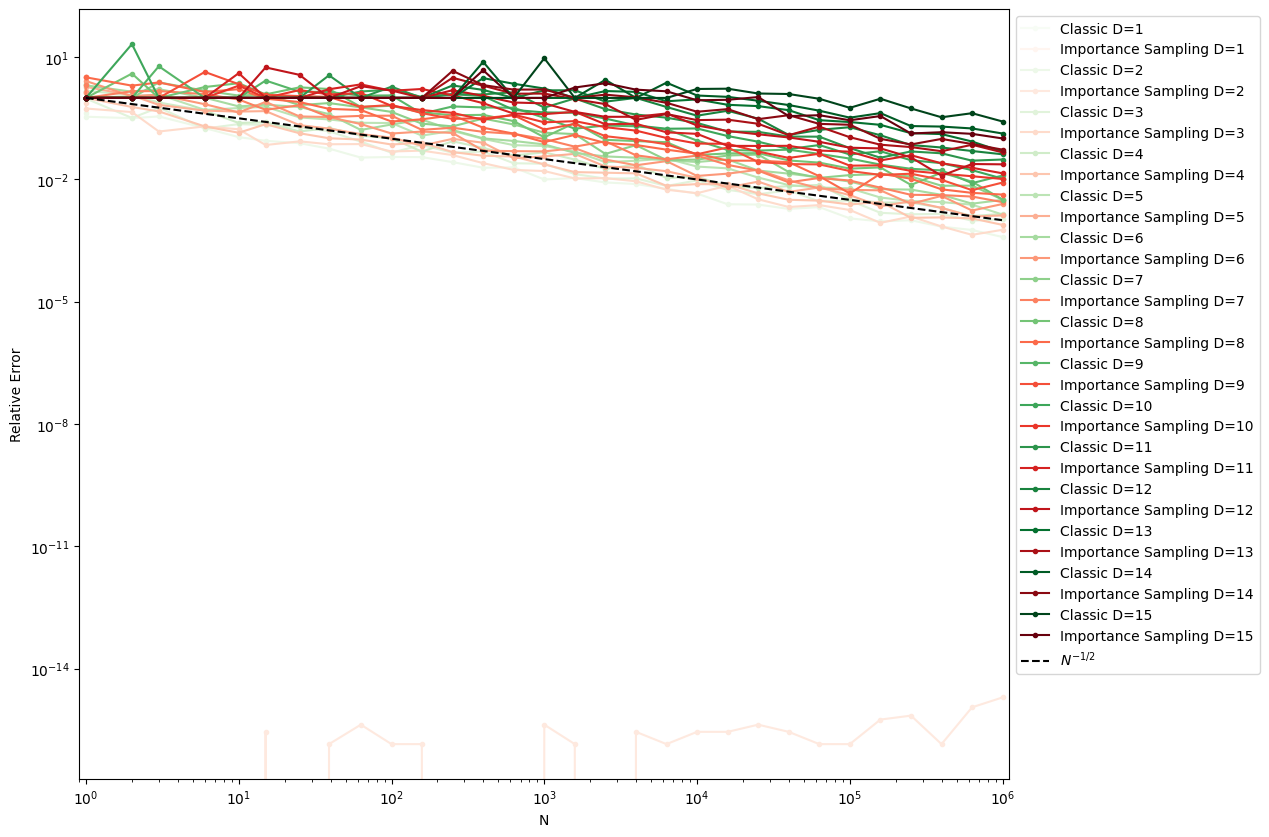

In [ ]:
cmap_r = cm.get_cmap('Reds', len(D_values))
plt.figure(figsize=(12,10))
for i, D in enumerate(D_values):
    color = cmap(i)
    plt.loglog(N_values, errors[i], ".-", label=f'Classic D={D}', color=color)
    color = cmap_r(i)
    plt.loglog(N_values, errors_improved[i], ".-", label=f'Importance Sampling D={D}', color=color)
plt.loglog(N_values, np.power(N_values, -0.5), 'k--', label="$N^{-1/2}$")
plt.xlabel('N')
plt.ylabel('Relative Error')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(min(N_values)*0.9, max(N_values)*1.1)
plt.show()

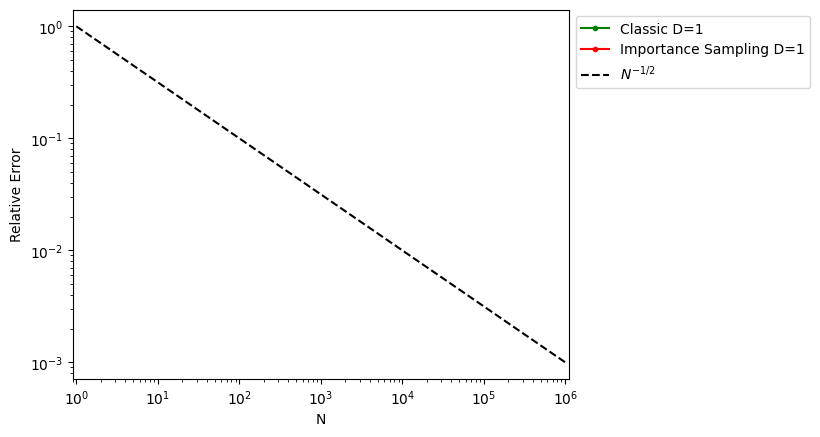

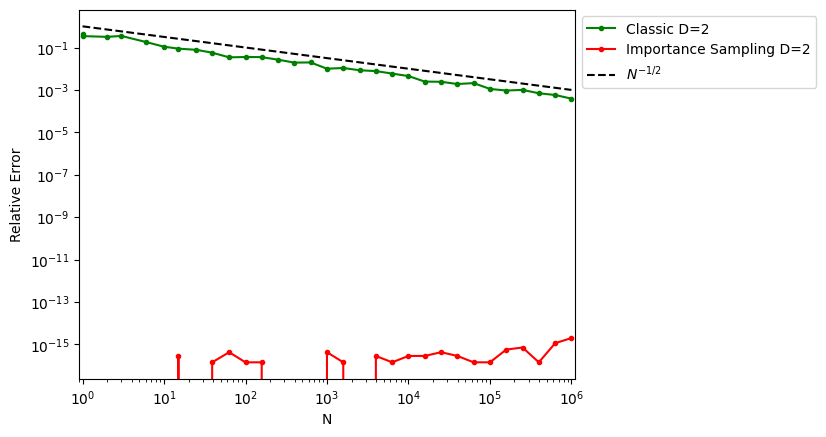

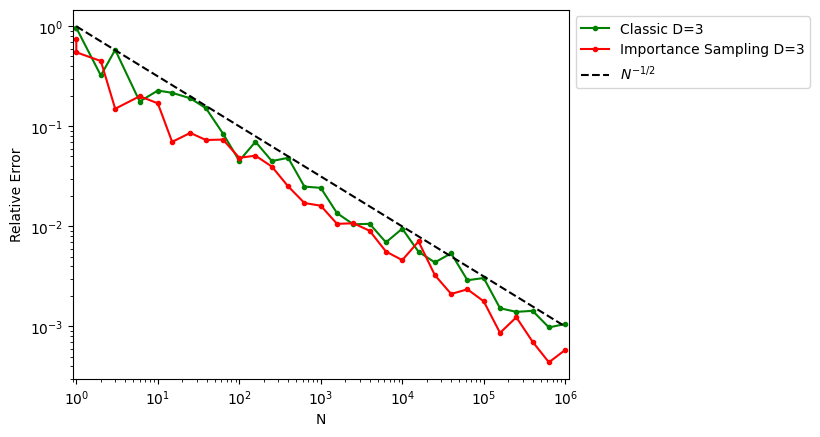

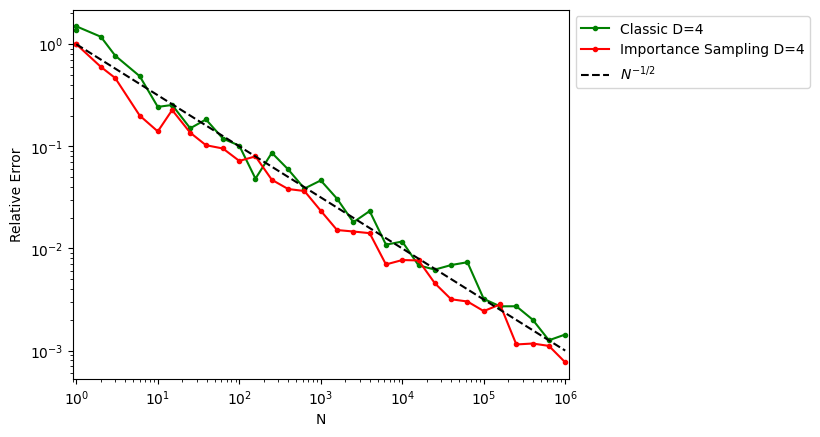

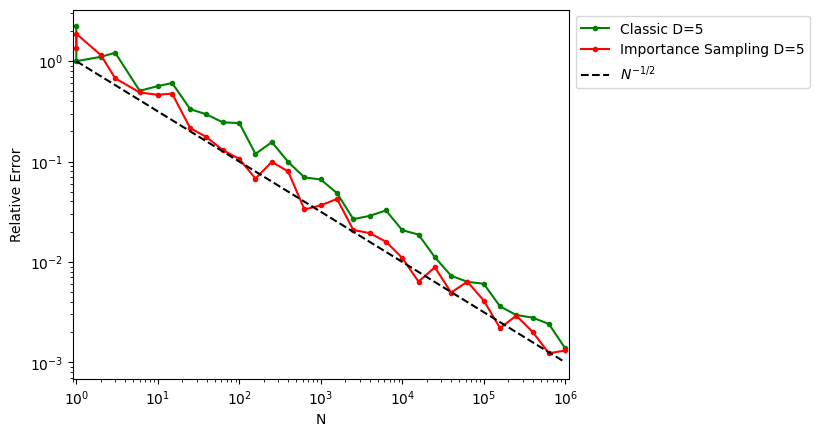

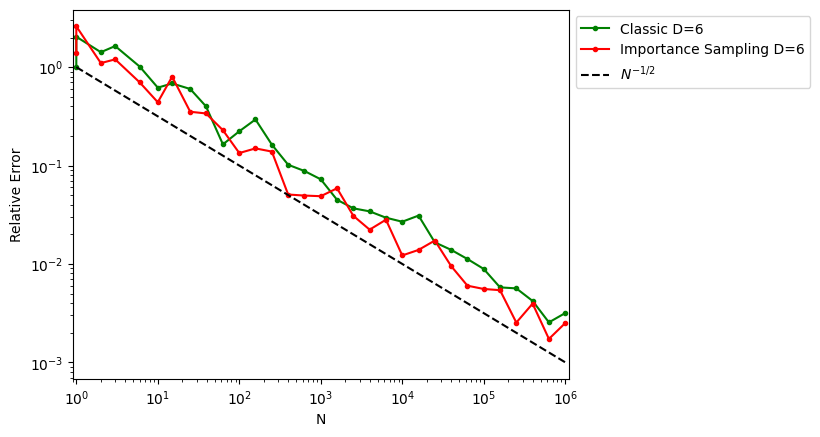

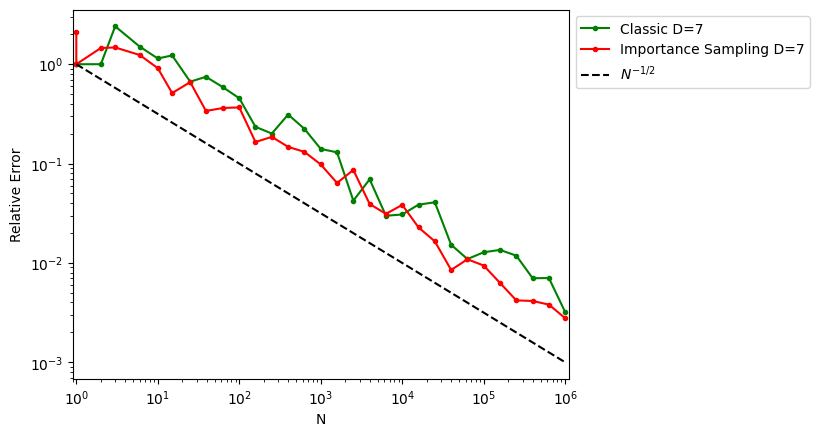

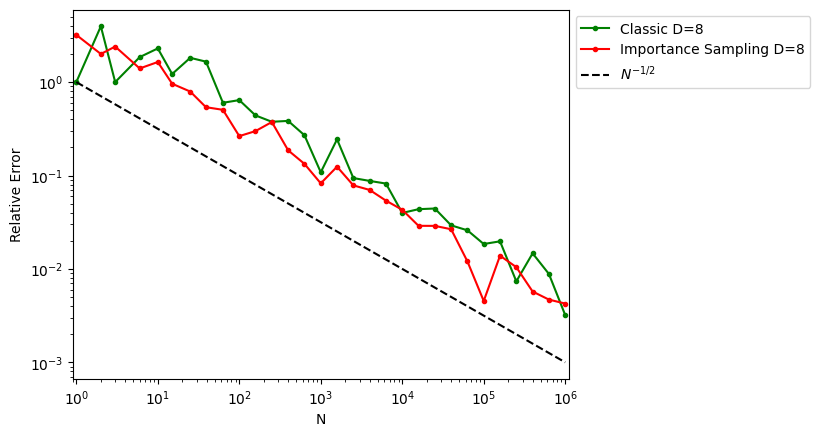

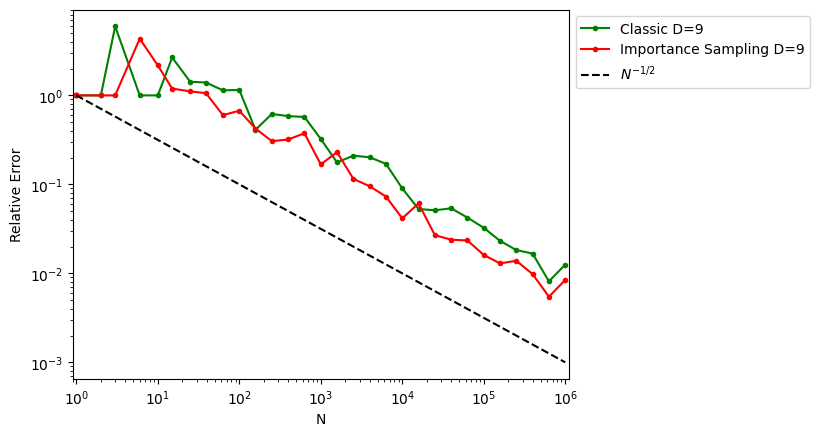

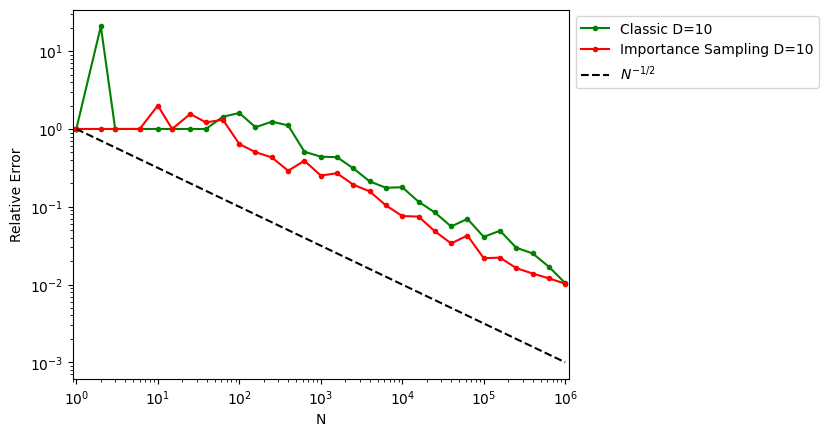

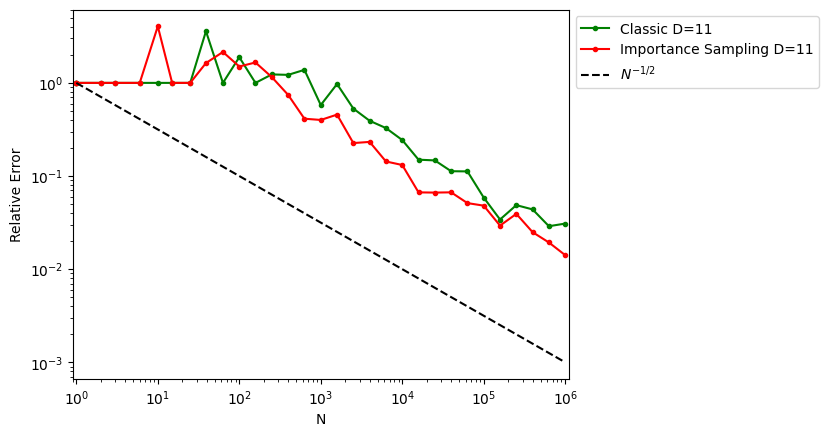

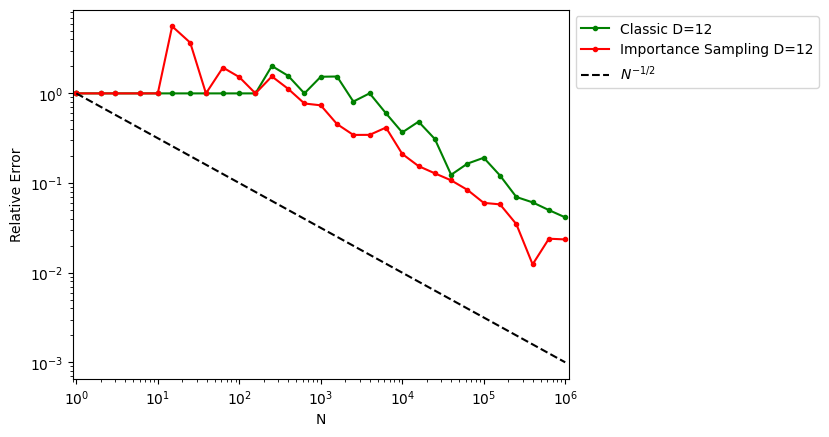

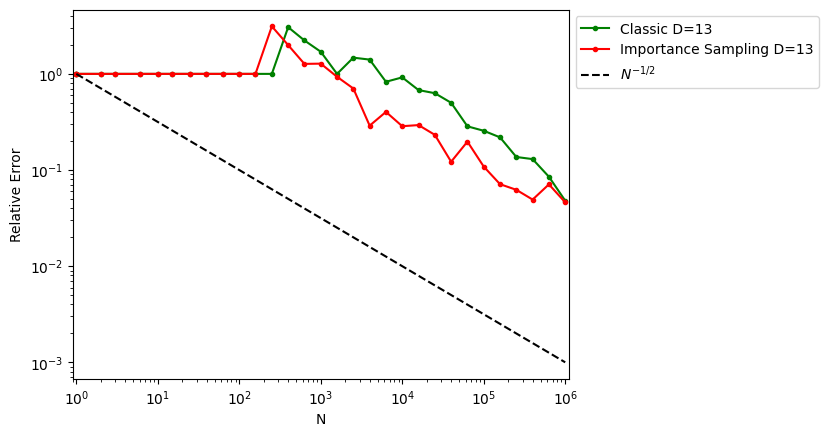

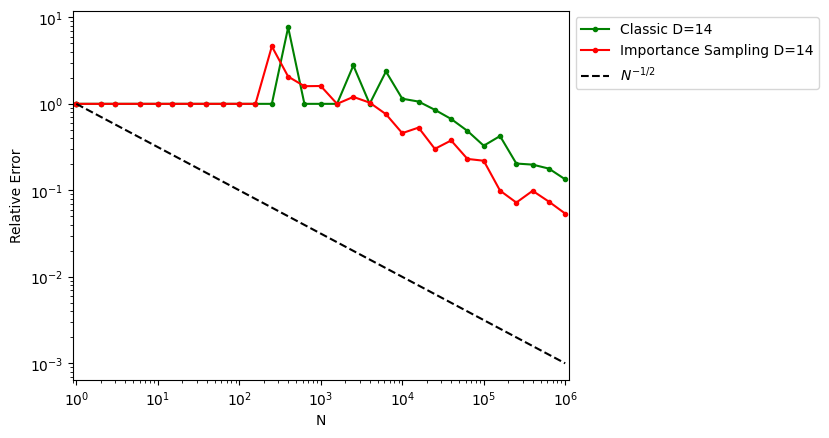

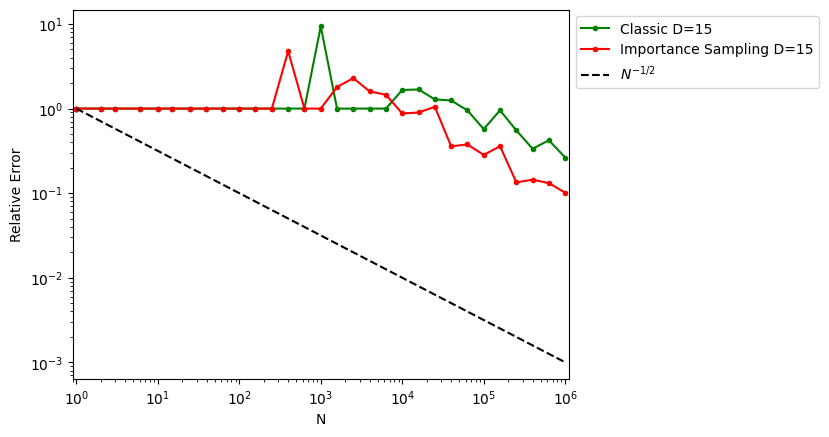

In [ ]:
for i, D in enumerate(D_values):
    plt.figure()
    plt.loglog(N_values, errors[i], "g.-", label=f'Classic D={D}')
    plt.loglog(N_values, errors_improved[i], "r.-", label=f'Importance Sampling D={D}')
    plt.loglog(N_values, np.power(N_values, -0.5), 'k--', label="$N^{-1/2}$")
    plt.xlabel('N')
    plt.ylabel('Relative Error')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlim(min(N_values)*0.9, max(N_values)*1.1)
    plt.show()

Во всех случаях, выборка по значимости чуть лучше. То есть, ошибка уменьшена в "константа" раз, но асимптотика осталась прежней.

### 6. Теоретически оцените величину уменьшения ошибки при переходе ко второму методу.

Ошибка (дисперсия) стандартной оценки Монте-Карло для $\mathbb{E}_P[X] $ равна:
$$
   \text{var}_P\left[\widehat{\mathbb{E}}_P[X]\right] = \frac{\text{var}_P[X]}{n},
$$
   где $ n $ — количество образцов.

При выборке из $Q$ оценка принимает вид:
   $$
   \widehat{\mathbb{E}}_Q\left[\frac{X}{Y}\right] = \frac{1}{n} \sum_{i=1}^n \frac{X_i}{Y_i}, \quad X_i \sim Q,
   $$
   где $ Y = \frac{dP}{dQ} $ — отношение правдоподобия. Её дисперсия равна:
   $$
   \text{var}_Q\left[\widehat{\mathbb{E}}_Q\left[\frac{X}{Y}\right]\right] = \frac{\text{var}_Q\left[\frac{X}{Y}\right]}{n}.
   $$

Теоретически оптимальное $ Q^* $ минимизирует $ \text{var}_Q\left[\frac{X}{Y}\right] $. Для $ X \geq 0 $ оно задаётся как:
   $$
   Q^*(x) \propto |X(x)|P(x),
   $$
   что приводит к нулевой дисперсии, но на практике нереализуемо (поскольку требует знания $ \mathbb{E}_P[X] $).

**Относительное уменьшение ошибки** определяется отношением дисперсий:
$$
\text{Фактор уменьшения ошибки} = \frac{\text{var}_Q\left[\frac{X}{Y}\right]}{\text{var}_P[X]}.
$$

Для задачи вычисления объёма шара в размерности $ D = 2 $:

1. **Стандартный метод (равномерное распределение на квадрате)**:

   Распределение $ P $ — равномерное на квадрате $[-1, 1]^2$ с плотностью $ p(x) = \frac{1}{4} $.
     $$
     \sigma_P^2 = \frac{1}{N} \cdot \text{var}_P\left(\frac{f}{p}\right) = \frac{1}{N} \cdot \left(4^2 \cdot \text{var}_P(f)\right).
     $$
     Поскольку $ \text{var}_P(f) = \mathbb{E}_P[f^2] - (\mathbb{E}_P[f])^2 = \frac{\pi}{4} - \left(\frac{\pi}{4}\right)^2 $, то:
     $$
     \sigma_P^2 = \frac{16}{N} \left(\frac{\pi}{4} - \frac{\pi^2}{16}\right).
     $$

3. **Выборка по значимости (равномерное распределение на круге)**:

   Распределение $ Q $ — равномерное на круге с плотностью $ p(x) = \frac{1}{\pi} $. Здесь $ \frac{f(x)}{p(x)} = \pi \cdot f(x) $, но так как $ Q $ сэмплирует только точки внутри шара, $ f(x) = 1 $ всегда.
     $$
     \sigma_Q^2 = \frac{1}{N} \cdot \text{var}_Q\left(\frac{f}{p}\right) = \frac{1}{N} \cdot \text{var}_Q(\pi) = 0,
     $$
     так как $ \pi $ — константа.

В идеальном случае для $ D = 2 $, когда $ Q $ — равномерное распределение на круге:
$$
\text{Фактор} = \frac{\text{var}_Q\left[\frac{X}{Y}\right]}{\text{var}_P[X]} = \frac{0}{\text{var}_P[X]} = 0.
$$
Это означает, что **ошибка полностью устраняется** (теоретически). На практике это соответствует точному результату уже при $ N = 1 $.

Для $ D = 2 $ предложенный метод (выборка из равномерного распределения на круге) даёт **нулевую дисперсию**, так как все сэмплы гарантированно попадают в область шара. Однако:
- Для $ D > 2 $ такой подход становится приближённым, так как произведение равномерных распределений на кругах не эквивалентно равномерному распределению на шаре.
- В многомерном случае фактор уменьшения ошибки будет зависеть от того, насколько $ Q $ "близко" к идеальному распределению на шаре.

Для $ D = 2 $ метод даёт **бесконечное ускорение** по сравнению со стандартным Монте-Карло, но это частный случай, обусловленный симметрией задачи.

### 7. Предложите свой способ уменьшения вариации оценки обьема шара по методу Монте-Карло.

Генерировать точки не из равномерного распределения на кубе, а из **многомерного нормального распределения** $ \mathcal{N}(0, \sigma^2I) $ с центром в начале координат. Объём шара оценивается как:
$$
V \approx \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{p(x_i)},
$$
где $ f(x) = 1 $, если $ \|x\| \leq 1 $ (точка внутри шара), $ p(x) $ — плотность нормального распределения.

**Преимущества**
1. **Фокусировка около центра**:
   - Большинство точек будут сконцентрированы вблизи центра шара, где вероятность попадания в шар максимальна.
   - Уменьшается доля "пустых" точек вне шара по сравнению с равномерной выборкой.

2. **Контроль через дисперсию**:
   - Подбор $ \sigma $ позволяет управлять распределением точек:
     - Малое $ \sigma $: точки близки к центру, но могут не достигать границы шара.
     - Большое $ \sigma $: точки чаще выходят за пределы шара, увеличивая потери.

3. **Аналитическая формула весов**:
   - Плотность нормального распределения в $ D $-мерном пространстве:
     $$
     p(x) = \frac{1}{(2\pi\sigma^2)^{D/2}} e^{-\frac{\|x\|^2}{2\sigma^2}}.
     $$
   - Вес точки: $ \frac{f(x)}{p(x)} = (2\pi\sigma^2)^{D/2} e^{\frac{\|x\|^2}{2\sigma^2}} \cdot \mathbf{1}_{\|x\| \leq 1} $.


**Проблемы**
1. **Рост дисперсии с увеличением размерности**:
   - В высокой размерности ($ D \gg 1 $) нормальное распределение концентрируется на сфере радиуса $ \sigma\sqrt{D} $ (см. [Concentration of measure](https://en.wikipedia.org/wiki/Concentration_of_measure)).
   - Если $ \sigma\sqrt{D} \gg 1 $, почти все точки будут вне шара, что делает метод неэффективным.

2. **Оптимальный выбор $ \sigma $**:
   - Для минимизации дисперсии требуется:
     $$
     \sigma_{\text{opt}} \approx \frac{1}{\sqrt{D}},
     $$
     чтобы пик плотности $ p(x) $ совпадал с границей шара ($ \|x\| = 1 $).

3. **Вычислительная сложность**:
   - Расчёт весов для каждой точки требует вычисления экспоненты, что затратно при больших $ D $.


## Замечание:

В методах выше тяжело было найти плотность распределения $p$, сгенерировать выборку величины с данным распределением часто проще.
Например, равномерное распределение на шаре $B$ можно получить из выборки $X_k$ равномерно распределенной на кубе $\Omega$ случайной величины,
отбрасывая все точки $X_k$, не лежащие в $B$, что является частным случаем метода [алгоритма Метрополиса-Гастингса](http://ru.wikipedia.org/wiki/Алгоритм_Метрополиса_—_Гастингса). Оказывается в ряде случаев достаточно уметь строить выборку для решения содержательных задач, как показано в следующем разделе.

# Модель Изинга

[Модель Изинга](https://en.wikipedia.org/wiki/Ising_model) является одной из самых простых моделей ферромагнетиков в статистической физике.
Ферромагнетик в этой модели описывается системой случайных величин $\sigma_n$, принимающих значения $\pm 1$,
соответстующих двум противоположным направлениям магнитного момента отдельного атома $n$.
Обычно атомы считаются организованными в некоторую кристаллическую решетку,
в самом простом случае, который мы будем обсуждать ниже, атомы образуют цепочку, т.е. $n\in\mathbb Z$.
Энергия системы включает в себя вклады обмена и взаимодействия с внешним магнитным полем $h_j$:
$$H[\sigma] = -\sum_{<i,j>}J_{ij}\sigma_i\sigma_j-\mu\sum_i H_j\sigma_j,$$
где $J_{ij}$ суть константы обмена между парой атомов $\langle i,j\rangle$,
каждая пара атомов в сумме присутствует один раз,
$\mu$ - величина магнитного момента атома.
Вероятность реализации каждого состояниия подчинена распределению Больцмана:
$$
P_\beta(\sigma)=Z_\beta^{-1}e^{-\beta H[\sigma]},
$$
где $\beta=(k_BT)^{-1}$, и статистическая сумма определена следующей суммой по всем состояниям $\sigma$:
$$
Z_\beta = \sum_\sigma e^{-\beta H[\sigma]}.
$$
Вместо бесконечной цепочки, мы будем рассматривать цепочку из $L$ атомов, концы которой соединены между собой,
т.е. заданы периодические граничные условия.
Мы будем использовать самый простой вариант модели, считая:
1) внешнее поле однородным  $h_j=h\quad\forall j$,
2) обмен ненулевым только для блищайших соседей и независящим от положения атомов на цепочке:
$J_{j,j+1}=J>0\quad\forall j$.

При анализе модели наибольший интерес представляет свободная энергия Гельмгольца
$$F=-k_BT\ln Z.$$
В одномерном случае она может быть найдена явно.
Действительно,
$$Z_\beta=\sum_{\sigma_1}\cdots\sum_{\sigma_L}\prod_{n=1}^{N-1}T_{\sigma_n,\sigma_{n+1}},$$
где
$$T_{\sigma,\sigma'}=\exp\left(\beta J\sigma\sigma'+\frac{\mu h}{2}(\sigma+\sigma')\right).$$
Если считать $\sigma=-1,1$ индексами матрицы
$$T=\begin{pmatrix}T_{-1,-1} & T_{-1,1}\\ T_{1,-1} & T_{1,1}\end{pmatrix}
=\begin{pmatrix}e^{\beta J-\beta\mu h} & e^{-\beta J}\\ e^{-\beta J} & e^{\beta J+\beta\mu h}\end{pmatrix},$$
то стат. сумму можно записать в матричном виде:
$$Z_\beta=\mathrm{Tr}\,T^N=\lambda_+^N+\lambda_{-}^N,$$
где $\lambda_\pm$ суть собственные значения матрицы $T$.
Известно довольно мало других решений для модели Изинга, поэтому представляет интерес численный расчет свободной энергии.

Вычисление стат. суммы в данном случае заключается в суммировании $2^L$ слагаемых, что может быть сделано явно.
Однако с ростом числа спинов $L$ время работы растет экспоненциально, что делает прямое суммирование применимым только для малых систем.
Поэтому стат. суммы часто считают методами Монте-Карло.
Выше мы вычисляли интеграл с помощью Монте-Карло, однако метод с таким же успехом может использоваться и для сумм.
Так в простейшем варианте мы можем зафиксировать семейство случайных величин $s_n$, принимающих значения $-1$ и $1$ с одинаковой вероятностью.
Тогда стат. сумму можно выразить через среднее значение на равномерном распределении:
$$Z_\beta = 2^L E[e^{-\beta H[s]}|\text{uniform distribution}] \approx \frac{2^L}{N}\sum_{k=1}^N \exp\big(-\beta H[s^{(k)}]\big),$$
где $s^{(k)}$ выборка состояний системы, равномерно распределеных на всем пространстве состояний.
Разброс оценок стат. суммы этим методом можно оценить через дисперсию случайной величины $e^{-\beta H[s]}$ на равномерном распределении (см. задания ниже):
$$
D = D[2^L e^{-\beta H[s]}] = E[2^{2L} e^{-2\beta H[s]}] - E[2^L e^{-\beta H[s]}]^2
= 2^L Z_{2\beta}-Z_{\beta}^2.
$$

In [ ]:
from dataclasses import dataclass

# Объект типа dataclass: https://docs.python.org/3/library/dataclasses.html
# В нем мы будем хранить параметры системы.
@dataclass
class Ising:
    J: float # Константа обмена
    muh: float # Магнитная индукция
    L: int # Число спинов
    def energy(self, state):
        """"Энергия состояния `state`"""
        return -model.J*np.sum(state*np.roll(state, 1, axis=-1), axis=-1)-model.muh*np.sum(state, axis=-1)
    def all_states(self):
        """Возвращает все состояния системы"""
        # Для хранения одного спина можно было ограничиться одним битом, но для простоты мы будем хранить число со знаком.
        states = np.moveaxis( np.indices((2,)*model.L), 0, -1 ).reshape((2**model.L, model.L)).astype(np.int8)
        return 2*states-1
    def random_states_uni(self, n):
        """Возвращает `n` случайных значений."""
        return 2*np.random.randint(0, 2, n*model.L, dtype=np.int8).reshape((n,model.L))-1

def partition_function_expl(model: Ising, beta: float) -> float:
    """Вычисляет стат. сумму одномерной модели Изинга по явной формуле."""
    ebj = np.exp(beta*model.J)
    ebb = np.exp(beta*model.muh)
    T = np.array([[ebj/ebb, 1/ebj], [1/ebj, ebj*ebb]])
    lambdas = np.linalg.eigvalsh(T)
    return np.sum(np.power(lambdas, model.L))

def partition_function_direct(model: Ising, beta: float) -> float:
    """Вычисляет стат. сумму одномерной модели Изинга по определению."""
    energy = model.energy(model.all_states())
    return np.sum(np.exp(-beta*energy))

def partition_function_mc(model: Ising, beta:float, nsamples:int) -> float:
    """Оценивает стат. сумму одномерной модели Изинга по Монте-Карло."""
    states = model.random_states_uni(nsamples)
#     states = model.all_states()
    energy = model.energy(states)
    p = np.exp(-beta*energy)
    return np.mean(p)*2**model.L


model = Ising(J=1.0, muh=0.1, L=1)
beta = 1.
print(f"Model {model} beta {beta}")
print(f"(ln Z)/L =")
print(f"  explicit   : {np.log(partition_function_expl(model, beta))/model.L}")
if model.L<=20:
    print(f"  direct     : {np.log(partition_function_expl(model, beta))/model.L}")
nsamples = 10000
print(f"  Monte-Carlo: {np.log(partition_function_mc(model, beta, nsamples))/model.L} #samples {nsamples}")


Model Ising(J=1.0, muh=0.1, L=1) beta 1.0
(ln Z)/L =
  explicit   : 1.6981388693815918
  direct     : 1.6981388693815918
  Monte-Carlo: 1.697740117912291 #samples 10000


## Задания.

### 8. Оцените точность вычисления $Z_\beta$ через собственные значения матрицы $T$. Как ведет себя погрешность при $\beta\to 0$, $\beta\to\infty$ и $L\to\infty$?
Для оценки погрешностей собственных значений матрицы удобно воспользоваться [теоремой Бауэра-Фике](https://en.wikipedia.org/wiki/Bauer%E2%80%93Fike_theorem).

In [ ]:
def partition_function_transfer(model: Ising, beta: float) -> float:
    ebj = np.exp(beta * model.J)
    ebb = np.exp(beta * model.muh)
    T = np.array([[ebj / ebb, 1 / ebj], [1 / ebj, ebj * ebb]])
    eigvals = np.linalg.eigvals(T)
    return np.sum(eigvals**model.L)

def calculate_error(model: Ising, beta: float) -> tuple:
    Z_transfer = partition_function_transfer(model, beta)
    Z_direct = partition_function_direct(model, beta)
    error_abs = np.abs(Z_transfer - Z_direct)
    error_rel = error_abs / Z_direct
    return Z_transfer, Z_direct, error_abs, error_rel

model = Ising(J=1.0, muh=0.1, L=10)
beta = 1.0
Z_transfer, Z_direct, error_abs, error_rel = calculate_error(model, beta)
print(f"Transfer Matrix Z: {Z_transfer}")
print(f"Direct Calculation Z: {Z_direct}")
print(f"Absolute Error: {error_abs}")
print(f"Relative Error: {error_rel}")

Transfer Matrix Z: 112673.09167673161
Direct Calculation Z: 112673.09167673148
Absolute Error: 1.3096723705530167e-10
Relative Error: 1.1623648122753002e-15


Для оценки погрешности используем **теорему Бауэра-Фике**: для диагонализуемой матрицы $ T = V\Lambda V^{-1} $ и возмущения $ \delta T $, погрешность собственных значений ограничена:
$$
|\delta \lambda| \leq \kappa(V) \|\delta T\|
$$
где $\kappa(V) = \|V\|\|V^{-1}\| $ - число обусловленности.


#### 1. $\beta \to 0$ (Высокие температуры)
Все элементы матрицы $ T_{ij} \to 1 $. Собственные значения становятся вырожденными $ \lambda_\pm \to 2 $
Однако абсолютная погрешность \( Z \) остается малой, так как:
$$
  Z \approx 2\cdot2^L = 2^{L+1}
$$

Относительная погрешность может расти из-за вырождения, но абсолютная погрешность мала.


#### 2. $\beta \to \infty$ (Низкие температуры)

Доминируют диагональные элементы матрицы:
$$
T_{11} = e^{\beta(J - \mu h)}, \quad T_{22} = e^{\beta(J + \mu h)}
$$

Наибольшее собственное значение:
$$
\lambda_+ \approx e^{\beta(J + |\mu h|)}
$$

Относительная погрешность убывает экспоненциально:
$$
\frac{\delta Z}{Z} \sim L \cdot \mathcal{O}(e^{-\beta J})
$$

Метод обеспечивает высокую точность при низких температурах благодаря доминированию основного состояния.


#### 3. $L \to \infty$ (Термодинамический предел)

Статсумма определяется максимальным собственным значением:
$$
Z \approx \lambda_+^L
$$

Полная погрешность растет линейно с размером системы:
$$
\frac{\delta Z}{Z} \sim L \cdot \frac{\delta\lambda_+}{\lambda_+},
$$
однако погрешность на один спин остается постоянной:
$$
\frac{1}{L}\frac{\delta Z}{Z} \sim \text{const}
$$
Метод сохраняет устойчивость, так как погрешность на спин не растет.

1. Для высоких температур ($\beta \to 0$) следует использовать:
   - Алгоритмы устойчивого вычисления собственных значений
   - Высокую точность арифметики

2. В низкотемпературном режиме ($\beta \to \infty$):
   - Метод обеспечивает максимальную точность
   - Можно использовать стандартные вычислительные процедуры

3. Для больших систем ($L \to \infty$):
   - Погрешность растет предсказуемо
   - Метод остается надежным при контроле ошибок округления

Метод матрицы переноса демонстрирует хорошую численную устойчивость для одномерной модели Изинга во всех рассмотренных предельных случаях.

### 9. Найдите узкие места в реализации вычисления стат. суммы прямым суммированием: как растет использование памяти с размером задачи, какие вычисления проводятся повторно? Предложите оптимизацию функции `partition_function_direct`. Для какого максимального размера системы можно на практике использовать эту функцию?

Узкие места:
- Хранение всех состояний в памяти тратит $2^L$
- Энергия каждого состояния вычисляется напрямую с нуля (можно оптимизировать)
- Хранить бинарные состояния (спин вверх/вниз) даже целыми числами очень невыгодно -- можно использовать битовые маски

Попробуем оптимизировать:

In [ ]:
from numba import njit

@njit(inline='always')
def highest_bit_index(n):
    index = 0
    while n > 1:
        n = n >> 1
        index += 1
    return index

@njit(nogil=True, cache=True, fastmath=True)
def fast_simple_partition(L, J, h, beta):
    Z = 0.0
    current_energy = -L * (J + h)  # спины вниз
    Z += np.exp(-beta * current_energy)

    spins = 0  # 0=-1 1=1

    for _ in range(1, 1 << L):
        # код Грея для битовой маски
        gray = _ ^ (_ >> 1)
        changed_bit = highest_bit_index(gray)
        mask = 1 << changed_bit

        left = changed_bit - 1
        if left < 0:
            left = L - 1
        right = changed_bit + 1
        if right >= L:
            right = 0

        left_spin = -1 + 2 * ((spins >> left) & 1)
        right_spin = -1 + 2 * ((spins >> right) & 1)

        old_spin = -1 + 2 * ((spins >> changed_bit) & 1)
        new_spin = -old_spin

        delta = 2 * (J * (left_spin + right_spin) + h) * old_spin

        spins ^= mask
        current_energy += delta
        Z += np.exp(-beta * current_energy)
    return Z

Benchmarking:   0%|          | 0/17 [00:00<?, ?it/s]

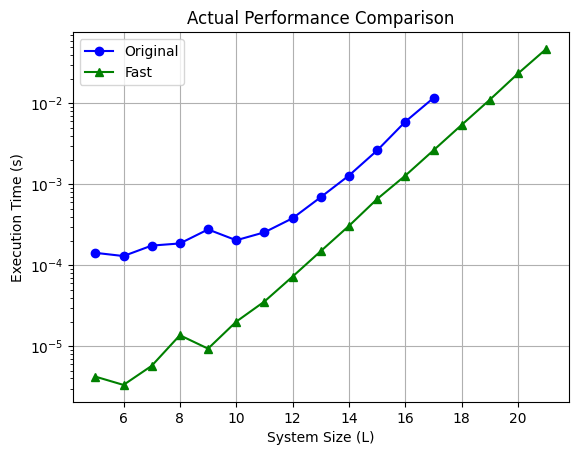

Real Speedup Factors
5: 33.9x 
6: 39.2x 
7: 30.6x 
8: 13.6x 
9: 29.7x 
10: 10.1x 
11: 7.2x 
12: 5.3x 
13: 4.6x 
14: 4.2x 
15: 4.0x 
16: 4.6x 
17: 4.4x 


In [ ]:
from tqdm.notebook import tqdm

def benchmark_corrected():
    L_values = np.arange(5, 22)
    orig_times = []
    fast_times = []

    for L in tqdm(L_values, desc="Benchmarking"):
        model = Ising(J=1.0, muh=0.1, L=int(L))
        if L <= 17:
            t = %timeit -o -q -r 2 -n 5 partition_function_direct(model, 1.0)
            orig_times.append(t.best)
        else:
            orig_times.append(np.nan)
        t = %timeit -o -q -r 2 -n 5 fast_simple_partition(J=1.0, h=0.1, L=int(L), beta=1.0)
        fast_times.append(t.best)

    plt.figure()
    plt.plot(L_values, orig_times, 'bo-', label='Original')
    plt.plot(L_values, fast_times, 'g^-', label='Fast')
    plt.xlabel('System Size (L)')
    plt.ylabel('Execution Time (s)')
    plt.yscale('log')
    plt.legend()
    plt.grid()
    plt.title('Actual Performance Comparison')
    plt.show()

    speedups = []
    for L in range(len(L_values)):
        if not np.isnan(orig_times[L]):
            speedup = orig_times[L]/fast_times[L]
            speedups.append((L_values[L], speedup))

    print("Real Speedup Factors")
    for L, speedup in speedups:
        print(f"{L}: {speedup:.1f}x ")

benchmark_corrected()

Обогнать прямое суммирование получилось только с `numba`, но, насколько мне известно, `np.sum` тоже использует параллелизацию. Мы выиграли по времени скорее концептуально, чем параллелизацией.

### 10. Вычислите стат. сумму методом Монте-Карло с равномерно и независимо распределенными случайными величинами $s$. Оцените скорость сходимости метода. Для относительной погрешности $10^{-5}$ оцените число спинов, начиная с которого метод Монте-Карло оказывается предпочтительнее прямого суммирования, если стоимость вычислений измерять в числе вызовов функции энергии $H$.

  0%|          | 0/20 [00:00<?, ?it/s]

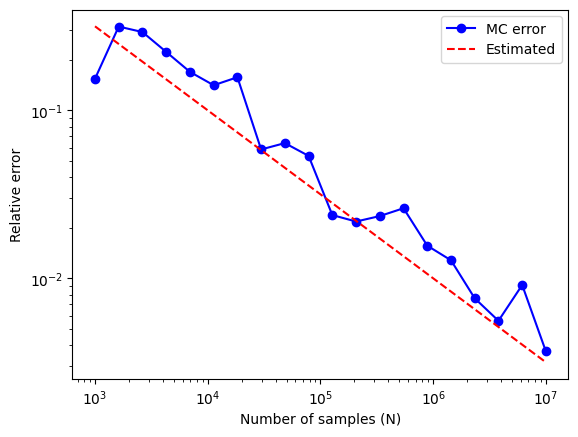

In [ ]:
def analyze_mc_convergence(model, beta, sample_sizes, trials=10):
    Z_exact = partition_function_expl(model, beta)
    errors = []

    for N in tqdm(sample_sizes):
        trial_errors = []
        for _ in range(trials):
            Z_mc = partition_function_mc(model, beta, N)
            rel_error = np.abs(Z_mc - Z_exact)/Z_exact
            trial_errors.append(rel_error)
        errors.append(np.mean(trial_errors))

    plt.figure()
    plt.loglog(sample_sizes, errors, 'bo-', label='MC error')
    plt.loglog(sample_sizes, 10/np.sqrt(sample_sizes), 'r--', label='Estimated')
    plt.xlabel('Number of samples (N)')
    plt.ylabel('Relative error')
    plt.legend()
    plt.show()
    return errors

model = Ising(J=1.0, muh=0.1, L=10)
beta = 1.0
sample_sizes = np.logspace(3, 7, num=20).astype(int)

errors = analyze_mc_convergence(model, beta, sample_sizes)

Ошибка убывает как $C/\sqrt{N}$


$$
\displaystyle{ \begin{aligned}\sigma \cong \frac{ 1 }{ \sqrt{ N } } \cong 10 ^{ - 5 } \\ \implies N = 10 ^{ 10 }\end{aligned} }
$$
Определим число спинов, для которого число вычислений прямого метода оказывается выше:

$$
\displaystyle{ L \cdot 2 ^{ L } \cong 10 ^{ 10 } }
$$

In [ ]:
l = 1
while l * 2**l < 10**10:
    l += 1
l

29

### 11. Найдите плотность состояний с помощью [алгоритма Ванга-Ландау](https://en.wikipedia.org/wiki/Wang_and_Landau_algorithm). Найдите стат. сумму, используя плотность состояний. Сравните результат с результатом методе Монте-Карло из предыдущего пункта. Можно ли вычислить стат. сумму методом Метрополиса-Гастингса? Какой из методов дает лучший результат?

Model: Ising(J=1.0, muh=0.1, L=10), beta: 1.0

Running Wang-Landau...
Wang-Landau finished after 690000 total steps.
Wang-Landau took 55.09 seconds.
Z (Wang-Landau): 1.804127e+05
F (Wang-Landau): -12.103002
ln(Z) (Wang-Landau): 12.103002

Running Monte-Carlo...
Monte-Carlo (100000 samples) took 0.02 seconds.
Z (Monte-Carlo): 1.223805e+05
F (Monte-Carlo): -11.714890
ln(Z) (Monte-Carlo): 11.714890

Running Exact Calculation...
Exact calculation took 0.0006 seconds.
Z (Exact): 1.126731e+05
F (Exact): -11.632246
ln(Z) (Exact): 11.632246


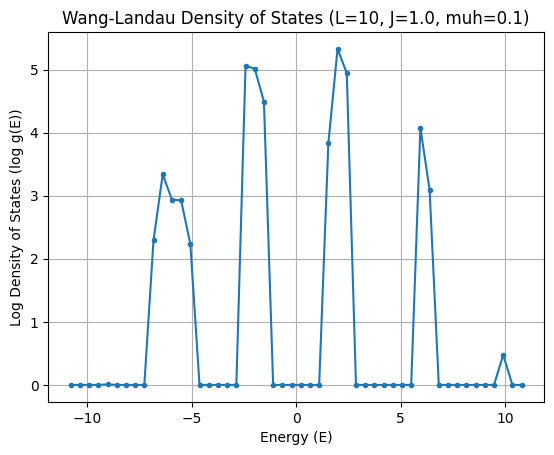

In [ ]:
import time

def wang_landau(model, n_bins=50, initial_log_f=1.0, log_f_threshold=1e-6, flatness_criterion=0.85, check_flatness_interval=20000):
    s_all_up = np.ones((1, model.L), dtype=np.int8)
    s_all_down = -np.ones((1, model.L), dtype=np.int8)
    min_E_est = -model.J * model.L - abs(model.muh) * model.L
    max_E_est = model.J * model.L + abs(model.muh) * model.L

    min_energy = min_E_est
    max_energy = max_E_est

    if max_energy <= min_energy:
        max_energy = min_energy + max(1.0, abs(min_energy * 0.1))

    energy_bins = np.linspace(min_energy, max_energy, n_bins + 1)
    bin_width = energy_bins[1] - energy_bins[0]

    log_g = np.zeros(n_bins)
    histogram = np.zeros(n_bins, dtype=int)

    log_f = initial_log_f

    current_state = model.random_states_uni(1)[0]
    current_energy = model.energy(current_state.reshape(1, -1))[0]
    current_bin = np.searchsorted(energy_bins, current_energy, side='right') - 1
    current_bin = np.clip(current_bin, 0, n_bins - 1)

    total_steps = 0
    max_steps_safety_factor = 50

    while log_f > log_f_threshold:
        steps_this_f = 0
        histogram.fill(0)
        flatness_achieved = False

        while not flatness_achieved:
            run_steps = check_flatness_interval // 10
            if run_steps < 1: run_steps = 1

            for _ in range(run_steps):
                steps_this_f += 1
                total_steps += 1

                new_state = current_state.copy()
                index_to_flip = np.random.randint(0, model.L)
                new_state[index_to_flip] *= -1

                new_energy = model.energy(new_state.reshape(1, -1))[0]
                new_bin = np.searchsorted(energy_bins, new_energy, side='right') - 1

                accepted = False
                if 0 <= new_bin < n_bins:
                    delta_log_g = log_g[current_bin] - log_g[new_bin]
                    if delta_log_g < 700:
                        acceptance_prob = min(1.0, np.exp(delta_log_g))
                        if np.random.rand() < acceptance_prob:
                            current_state = new_state
                            current_energy = new_energy
                            current_bin = new_bin
                            accepted = True

                if 0 <= current_bin < n_bins:
                    log_g[current_bin] += log_f
                    histogram[current_bin] += 1

            if steps_this_f % check_flatness_interval == 0:
                visited_mask = histogram > 0
                num_visited = np.sum(visited_mask)
                if num_visited > 1:
                    hist_visited = histogram[visited_mask]
                    mean_h = np.mean(hist_visited)
                    min_h = np.min(hist_visited)

                    if mean_h > 0 and min_h >= flatness_criterion * mean_h:
                        flatness_achieved = True

            if steps_this_f > check_flatness_interval * max_steps_safety_factor:
                print(f"Warning: Exceeded max steps ({steps_this_f}) for log_f = {log_f:.2e}. Proceeding.")
                break

        visited_mask_norm = np.isfinite(log_g) & (log_g != 0.0)
        if np.any(visited_mask_norm):
            min_log_g_stage = np.min(log_g[visited_mask_norm])
            log_g[visited_mask_norm] -= min_log_g_stage
            log_g[~visited_mask_norm] = 0.0
            log_g = np.maximum(log_g, 0.0)

        log_f /= 2.0

    print(f"Wang-Landau finished after {total_steps} total steps.")

    bin_midpoints = energy_bins[:-1] + bin_width / 2.0
    return log_g, bin_midpoints

def wang_landau_with_bins(model, n_bins=50, initial_log_f=1.0, log_f_threshold=1e-6, flatness_criterion=0.85, check_flatness_interval=20000):
    s_all_up = np.ones((1, model.L), dtype=np.int8)
    s_all_down = -np.ones((1, model.L), dtype=np.int8)
    min_E_est = -model.J * model.L - abs(model.muh) * model.L
    max_E_est = model.J * model.L + abs(model.muh) * model.L

    min_energy = min_E_est
    max_energy = max_E_est

    if max_energy <= min_energy:
        max_energy = min_energy + max(1.0, abs(min_energy * 0.1))

    energy_bins = np.linspace(min_energy, max_energy, n_bins + 1)
    bin_width = energy_bins[1] - energy_bins[0]
    bin_midpoints = energy_bins[:-1] + bin_width / 2.0

    log_g = np.zeros(n_bins)
    histogram = np.zeros(n_bins, dtype=int)

    log_f = initial_log_f

    current_state = model.random_states_uni(1)[0]
    current_energy = model.energy(current_state.reshape(1, -1))[0]
    current_bin = np.searchsorted(energy_bins, current_energy, side='right') - 1
    current_bin = np.clip(current_bin, 0, n_bins - 1)

    total_steps = 0
    max_steps_safety_factor = 50

    while log_f > log_f_threshold:
        steps_this_f = 0
        histogram.fill(0)
        flatness_achieved = False

        while not flatness_achieved:
            run_steps = check_flatness_interval // 10
            if run_steps < 1: run_steps = 1

            for _ in range(run_steps):
                steps_this_f += 1
                total_steps += 1

                new_state = current_state.copy()
                index_to_flip = np.random.randint(0, model.L)
                new_state[index_to_flip] *= -1

                new_energy = model.energy(new_state.reshape(1, -1))[0]
                new_bin = np.searchsorted(energy_bins, new_energy, side='right') - 1

                accepted = False
                if 0 <= new_bin < n_bins:
                    delta_log_g = log_g[current_bin] - log_g[new_bin]
                    if delta_log_g < 700:
                        acceptance_prob = min(1.0, np.exp(delta_log_g))
                        if np.random.rand() < acceptance_prob:
                            current_state = new_state
                            current_energy = new_energy
                            current_bin = new_bin
                            accepted = True

                if 0 <= current_bin < n_bins:
                    log_g[current_bin] += log_f
                    histogram[current_bin] += 1

            if steps_this_f % check_flatness_interval == 0:
                visited_mask = histogram > 0
                num_visited = np.sum(visited_mask)
                if num_visited > 1:
                    hist_visited = histogram[visited_mask]
                    mean_h = np.mean(hist_visited)
                    min_h = np.min(hist_visited)

                    if mean_h > 0 and min_h >= flatness_criterion * mean_h:
                        flatness_achieved = True

            if steps_this_f > check_flatness_interval * max_steps_safety_factor:
                print(f"Warning: Exceeded max steps ({steps_this_f}) for log_f = {log_f:.2e}. Proceeding.")
                break

        visited_mask_norm = np.isfinite(log_g) & (log_g != 0.0)
        if np.any(visited_mask_norm):
            min_log_g_stage = np.min(log_g[visited_mask_norm])
            log_g[visited_mask_norm] -= min_log_g_stage
            log_g[~visited_mask_norm] = 0.0
            log_g = np.maximum(log_g, 0.0)

        log_f /= 2.0

    print(f"Wang-Landau finished after {total_steps} total steps.")

    return log_g, bin_midpoints, energy_bins

def partition_function_dos(log_g, energy_values, beta, bin_width, num_states):
    max_log_g = np.max(log_g[np.isfinite(log_g)])
    log_g_normalized = log_g - max_log_g
    g = np.exp(log_g_normalized)
    Z = np.sum(g * np.exp(-beta * energy_values)) * bin_width
    Z *= num_states / np.sum(g * bin_width)
    return Z, -np.log(Z)/beta if beta != 0 else np.inf

model = Ising(J=1.0, muh=0.1, L=10)
beta = 1.0

print(f"Model: {model}, beta: {beta}")

print("\nRunning Wang-Landau...")
num_states = 2**model.L
start_time = time.time()
log_g_wl, energy_vals_wl, energy_bins_wl = wang_landau_with_bins(
    model,
    n_bins=50,
    initial_log_f=1.0,
    log_f_threshold=1e-8,
    flatness_criterion=0.80,
    check_flatness_interval=10000
)
wl_time = time.time() - start_time
print(f"Wang-Landau took {wl_time:.2f} seconds.")

valid_dos = np.isfinite(log_g_wl) & (log_g_wl > -np.inf)
if log_g_wl is not None and energy_vals_wl is not None and len(energy_bins_wl) > 1:
    bin_width_wl = energy_bins_wl[1] - energy_bins_wl[0]
    valid_dos_wl = np.isfinite(log_g_wl) & (log_g_wl > -np.inf)
    if np.any(valid_dos_wl):
        Z_dos, F_dos = partition_function_dos(log_g_wl[valid_dos_wl], energy_vals_wl[valid_dos_wl], beta, bin_width_wl, num_states)
        print(f"Z (Wang-Landau): {Z_dos:.6e}")
        print(f"F (Wang-Landau): {F_dos:.6f}")
        print(f"ln(Z) (Wang-Landau): {np.log(Z_dos):.6f}")
    else:
        print("Wang-Landau failed to explore energy states effectively.")
        Z_dos = np.nan
        F_dos = np.nan
else:
    print("Error: Wang-Landau did not return valid density of states.")
    Z_dos = np.nan
    F_dos = np.nan

print("\nRunning Monte-Carlo...")
nsamples_mc = 100000
start_time = time.time()
Z_mc = partition_function_mc(model, beta, nsamples=nsamples_mc)
mc_time = time.time() - start_time
print(f"Monte-Carlo ({nsamples_mc} samples) took {mc_time:.2f} seconds.")
if Z_mc > 0:
    F_mc = -np.log(Z_mc) / beta
    print(f"Z (Monte-Carlo): {Z_mc:.6e}")
    print(f"F (Monte-Carlo): {F_mc:.6f}")
    print(f"ln(Z) (Monte-Carlo): {np.log(Z_mc):.6f}")
else:
    print(f"Z (Monte-Carlo) calculation resulted in non-positive value: {Z_mc}")

print("\nRunning Exact Calculation...")
start_time = time.time()
Z_exact = partition_function_expl(model, beta)
exact_time = time.time() - start_time
print(f"Exact calculation took {exact_time:.4f} seconds.")
if Z_exact > 0:
    F_exact = -np.log(Z_exact) / beta
    print(f"Z (Exact): {Z_exact:.6e}")
    print(f"F (Exact): {F_exact:.6f}")
    print(f"ln(Z) (Exact): {np.log(Z_exact):.6f}")
else:
    print(f"Z (Exact) calculation resulted in non-positive value: {Z_exact}")

if np.any(valid_dos):
    plt.figure()
    plt.plot(energy_vals_wl[valid_dos], log_g_wl[valid_dos], marker='.', linestyle='-')
    plt.xlabel("Energy (E)")
    plt.ylabel("Log Density of States (log g(E))")
    plt.title(f"Wang-Landau Density of States (L={model.L}, J={model.J}, muh={model.muh})")
    plt.grid(True)
    plt.show()

Метод Ванга-Ландау, как правило, дает лучший результат для вычисления плотности состояний,
а затем и статистической суммы, особенно для больших систем.

Метод Метрополиса-Гастингса использует марковскую цепь,
и его сходимость может быть медленной, особенно в случае сложных энергетических ландшафтов.
Метод Ванга-Ландау более эффективно исследует пространство состояний,
что позволяет получить более точное приближение плотности состояний и, следовательно, статистической суммы.

Однако, метод Монте-Карло может быть предпочтительнее для больших систем,
где прямое суммирование становится невозможным из-за вычислительных ограничений.
Важно отметить, что выбор наилучшего метода зависит от конкретной задачи и доступных вычислительных ресурсов.

In [ ]:
from collections import defaultdict
# Простая реализация алгоритма Ванга-Ландау (число состояний считается для каждой энергии, без объединения в группы).
def WangLandauAlgorithm(model:Ising, nsamples=None):
    H = defaultdict(lambda: 0) # Хранилище для гистограммы.
    g = defaultdict(lambda: 1.) # Хранилище для плотности состояний
    f = 1.4 # Множитель для обновления числа состояний.
    state = model.random_states_uni(1) # Начальное состояние
    energy = model.energy(state)[0] # Энергия текущего состояния
    H[energy] = H[energy] + 1
    g[energy] = g[energy] * f
    rejected = 0
    for it in range(nsamples): # Делаем заданное число итераций.
        # Генерируем новое состояние
        candidate = model.random_states_uni(1) # Новое состояние.

        # Обычно новое состояние генерируется небольшим возмущением старого состояний `state`,
        # так как в этом случае энергия меняется плавнее, и время пересчета энергии меньше.
        # Например, это можно было делать так:
#         candidate = state.copy()
#         candidate[0, np.random.randint(model.L)] *= -1
        # Затем на нужно было бы реализовать функцию обновления энергия, учитывая изменение лишь одного спина.

        candidate_energy = model.energy(candidate)[0] # Считаем энергию нового состояния.
        p = np.minimum(1., g[energy]/g[candidate_energy]) # Вероятность принятия состояния.
        if np.random.random()<=p: #  Если состояние принято,
            state = candidate # обновляем состояние.
            energy = candidate_energy
        else:
            rejected += 1
        H[energy] = H[energy] + 1
        g[energy] = g[energy] * f
        # Проверяем возможность обновления шага `f`.
        vals=np.array(list(H.values()))
        std, mean = np.std(vals), np.mean(vals)
        if len(vals)>10 and std/mean<0.25:
            # print(f"Restart {it = }: {f = }")
            f = np.sqrt(f) # Уменьшаем шаг.
            H = defaultdict(lambda:0) # Обнуляем накопленные значения.
    # print(f"Rejected states {rejected}/{nsamples}")
    # Перенормируем энтропию.
    g_sum = np.sum(list(g.values()))
    total_count_elements = 2**model.L
    return { k: total_count_elements*s/g_sum for k,s in g.items() }

In [ ]:
model = Ising(J=1.0, muh=0.1, L=10)
beta = 0.5
nsamples = 10000
experiment = WangLandauAlgorithm(model, nsamples)
frequency = np.array(list(experiment.values()))
energy = np.array(list(experiment.keys()))
Z_expl = partition_function_expl(model, beta)
print(f'Z_explicit = {Z_expl}')
Z_WL = np.sum(np.exp(-beta * energy ) * frequency)
print(f'Z_Wang_Landau = {Z_WL}')
Z_mc = partition_function_mc(model, beta, nsamples)
print(f'Z_monte_carlo = {Z_mc}')

Z_explicit = 3522.27322215406
Z_Wang_Landau = 3146.635215421411
Z_monte_carlo = 3771.795971559927


In [ ]:
J = np.linspace(1, 50, 25)
beta = 0.5
T = 1
L = 10
nsamples = 10000
muh = 0.1

def mean_energy(E, Z):
  return np.sum(np.exp(-E*beta)/Z*E)

energy_monte_carlo = [None]*(len(J))
energy_wanga_landau = [None]*(len(J))
exact_energy = [None]*(len(J))
z_mc = [None]*(len(J))
z_wl = [None]*(len(J))
z_expl = [None]*(len(J))

for i in range(len(J)):
  model = Ising(J=J[i], muh=muh, L=L)
  energy = model.energy(model.all_states())
  z_mc[i] = partition_function_mc(model, beta, nsamples)
  z_expl[i] = partition_function_expl(model, beta)

  experiment = WangLandauAlgorithm(model, nsamples)
  freq = np.array(list(experiment.values()))
  energy = np.array(list(experiment.keys()))
  z_wl[i] = np.sum(np.exp(-beta * energy ) * freq)

  energy_monte_carlo[i] = mean_energy(energy,z_mc[i])
  energy_wanga_landau[i] = mean_energy(energy,z_wl[i])
  exact_energy[i] = mean_energy(energy, z_expl[i])

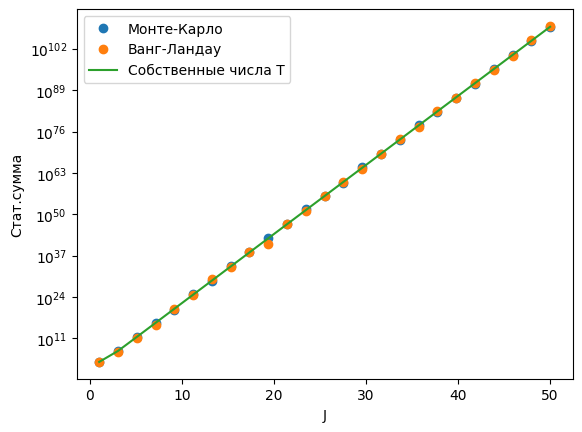

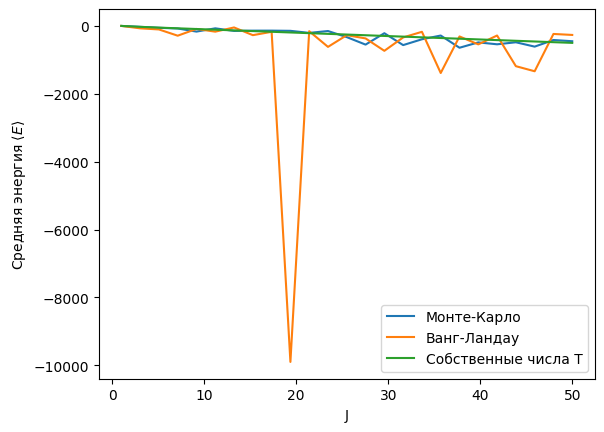

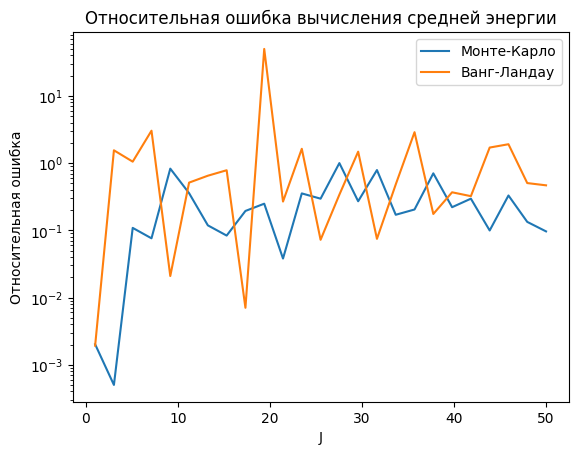

In [ ]:
plt.semilogy(J,z_mc, "o", label='Монте-Карло')
plt.semilogy(J,z_wl, "o", label='Ванг-Ландау')
plt.semilogy(J,z_expl,  label='Собственные числа T')
plt.xlabel('J')
plt.ylabel('Стат.сумма')
plt.legend()
plt.show()
plt.plot(J,energy_monte_carlo, label='Монте-Карло')
plt.plot(J,energy_wanga_landau, label='Ванг-Ландау')
plt.plot(J,exact_energy, label='Собственные числа T')
plt.xlabel('J')
plt.ylabel(r'Средняя энергия $\langle E\rangle$')
plt.legend()
plt.show()
plt.semilogy(J, np.abs((np.array(energy_monte_carlo) - np.array(exact_energy)) / np.array(exact_energy)), label='Монте-Карло')
plt.semilogy(J, np.abs((np.array(energy_wanga_landau) - np.array(exact_energy)) / np.array(exact_energy)), label='Ванг-Ландау')
plt.xlabel('J')
plt.ylabel('Относительная ошибка')
plt.title('Относительная ошибка вычисления средней энергии')
plt.legend()
plt.show()

### 13. Постройте тот же график без вычисления стат. суммы, опираясь только на метод [Метрополиса-Гастингса](http://ru.wikipedia.org/wiki/Алгоритм_Метрополиса_—_Гастингса) для генерирования выборки состояний $\sigma$, подчиненных распределению Больцмана.

In [ ]:
beta = 0.5
muh = 0.1
L = 10
model = Ising(J=1, muh=muh, L=L)
n_samples = 10**4
J = np.linspace(1, 50, 25)
sigma = np.linspace(0.1,1, 10)

def distrib(x):
  return np.exp(-x*beta)

def MG(model, beta, n_samples, sigma):
    curr_state = model.random_states_uni(1)[0]
    states = np.zeros((int(n_samples), int(model.L)))
    states[0] = curr_state
    accepts = 0
    for i in range(1, int(n_samples)):
        state_new = np.random.normal(states[i-1], sigma)
        curr_state = states[i-1]

        state_energy = model.energy([curr_state])
        energy_new = model.energy([state_new])

        a = distrib(energy_new) / distrib(state_energy)
        if a >= 1:
          curr_state = state_new
          accepts += 1
          states[i] = curr_state
        elif a < 1:
          p = np.random.uniform(0.0,1.0)
          if p < a:
            curr_state = state_new
            accepts += 1
            states[i] = curr_state
        acceptance_rate = accepts / n_samples
    return states, acceptance_rate

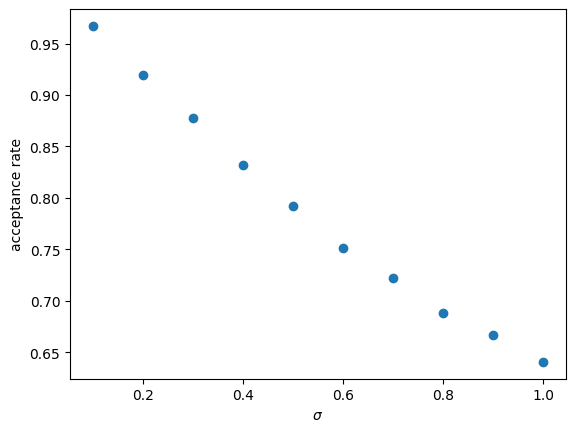

In [ ]:
ar_setup = [None]*len(sigma)
for s in range(len(sigma)):
  ar_setup[s] = MG(model, beta, n_samples=n_samples, sigma = sigma[s])[1]

plt.plot(sigma, ar_setup, "o")
plt.xlabel(r"$\sigma$")
plt.ylabel('acceptance rate')
plt.show()

In [ ]:
states, acceptance_rate = MG(model, beta, n_samples=n_samples, sigma = 1)

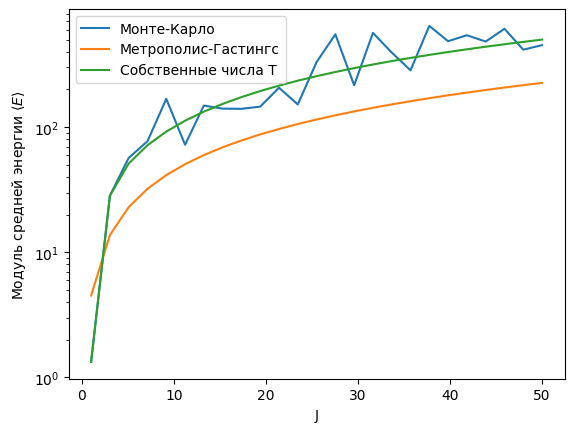

In [ ]:
energy_mg = [None]*len(J)

for i in range(len(J)):
    model = Ising(J=J[i], muh=muh, L=L)
    energy = model.energy(states)
    energy_mg[i] = np.sum(energy)/len(energy)

plt.semilogy(J, np.abs(energy_monte_carlo), label='Монте-Карло')
plt.semilogy(J, np.abs(energy_mg), label='Метрополис-Гастингс')
plt.semilogy(J, np.abs(exact_energy), label='Собственные числа T')
plt.xlabel('J')
plt.ylabel(r'Модуль средней энергии $\langle E\rangle$')
plt.legend()
plt.show()

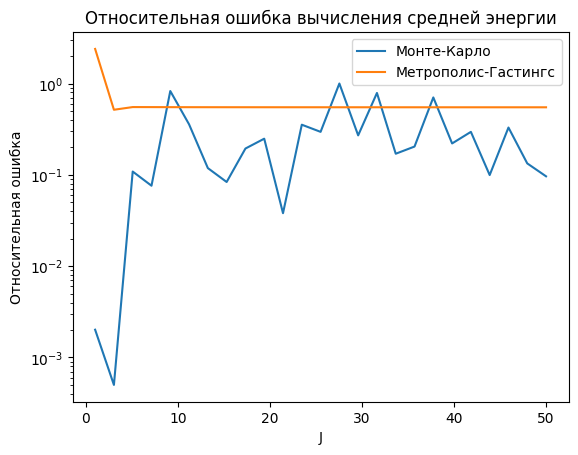

In [ ]:
plt.semilogy(J, np.abs((np.array(energy_monte_carlo) - np.array(exact_energy)) / np.array(exact_energy)), label='Монте-Карло')
plt.semilogy(J, np.abs((np.array(energy_mg) - np.array(exact_energy)) / np.array(exact_energy)), label='Метрополис-Гастингс')
plt.xlabel('J')
plt.ylabel('Относительная ошибка')
plt.title('Относительная ошибка вычисления средней энергии')
plt.legend()

Видим, что с увеличением $J$ погрешность метода Монте-Карло приближается с уровню ошибки вычисления методом Метрополиса-Гастингса, однако все же существенно ниже.

### 12. Постройте график зависимости средней энергии от константы связи $J$, используя (1) найденную численно оценку для стат. суммы, (2) плотность состояний из метода Ванга-Ландау. Сравните с теорией. Что удается найти точнее: среднюю энергию или стат. сумму?

Графики выше. Ошибка через Ванга-Ландау существенно выше, чем через оценку стат.суммы. Стат.сумму удается найти точнее, чем среднюю энергию

### 14. Постройте график зависимости намагниченности от приложенного поля, используя связь стат. суммы и намагниченности:
$$M=\frac{\partial \ln Z}{\partial \mu h},$$
и сравните с расчетом намагниченности (как суммы магнитных моментов всех атомов) по алгоритму Метрополиса-Гастингса.

In [ ]:
def energy_variation_by_flip(state, spin, J, muh):
    n = state.shape[0]
    a, b, c = state[(spin-1)%n], state[spin%n], state[(spin+1)%n]
    de = 2*(J*(a+c)+muh)*b
    return de

def metropolis(state, nsamples, pause, J, muh, kBT):
    N = state.shape[0]
    samples = np.empty(nsamples, dtype=np.float32)
    eJ, eh = 0., 0.
    for n in range(N-1):
        eJ += state[n]*state[n+1]
        eh += state[n]
    eJ += state[0]*state[N-1]
    eh += state[N-1]
    samples[0] = e = -J*eJ-muh*eh
    M = [np.sum(state)]
    for n in range(1,nsamples):
        dq = 0
        for k in range(pause):
            q = np.random.randint(N)
            de = energy_variation_by_flip(state, q, J, muh)
            alpha = np.exp(-de/kBT)
            u = np.random.random()
            if u<=alpha:
                state[q] *= -1
                e += de
                dq += 2*state[q]
        M.append(M[-1]+dq)
        samples[n] = e
    return samples, M

def diff(x,y):
    y1 = y[:-2:]
    y3 = y[2::]
    x1 = x[:-2:]
    x3 = x[2::]
    h2 = x3-x1
    dydx = (y3-y1)/h2
    return dydx


In [ ]:
MUH = np.linspace(0.01, 1, 100)
J = 1.0
L = 20
nsamples = 4000
M1 = []
M2 = []
beta = 1
for muh in MUH:
    model = Ising(J=J, muh=muh, L=L)
    kBT = 1 / beta
    M1.append(kBT * np.log(partition_function_direct(model, beta)))
    state = model.random_states_uni(1).flatten()
    samples, m = metropolis(state, nsamples, 10, model.J, model.muh, kBT)
    M2.append(np.mean(m))

M1 = np.array(M1)
M1 = diff(MUH, M1)
M2 = np.array(M2)

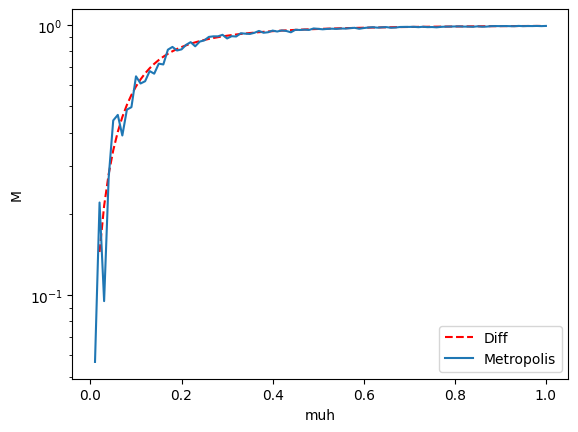

In [ ]:
plt.semilogy(MUH[1:-1],M1/L,'r--', label='Diff')
plt.semilogy(MUH,M2/L,label='Metropolis')
plt.xlabel('muh')
plt.ylabel('M')
plt.legend()
plt.show()

### 15. В модели с цепочкой не наблюдается фазового перехода, однако на двухмерной решетке есть фазовый переход по температуре.
Постройте график зависимости средней намагниченности от температуры для двухмерной решетки спинов.
Найдите критическое значение температуры. Опишите состояния при температуре ниже и выше критической.

In [ ]:
def magnetization_vs_temperature(J, L, nsamples, T_min, T_max, num_temps):
    Temperatures = np.linspace(T_min, T_max, num_temps)
    Magnetizations = []

    for T in Temperatures:
        beta = 1 / T
        model = Ising(J=J, muh=0.0, L=L)
        state = model.random_states_uni(1).flatten()
        samples, m = metropolis(state, nsamples, 10, model.J, model.muh, T)
        Magnetizations.append(np.abs(np.mean(m)) / L)

    return Temperatures, Magnetizations

In [ ]:
J = 5
L = 50
nsamples = 1000
T_min = 1
T_max = 100
num_temps = 1000


Temperatures, Magnetizations = magnetization_vs_temperature(J, L, nsamples, T_min, T_max, num_temps)

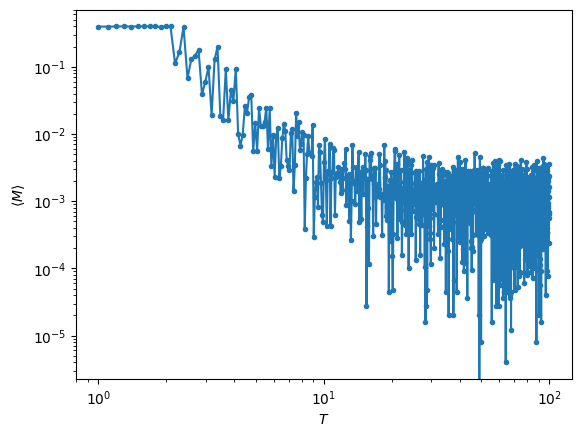

Estimated critical temperature: 2.288288288288288


In [ ]:
plt.loglog(Temperatures, Magnetizations,'.-')
plt.xlabel('$T$')
plt.ylabel(r'$\langle M\rangle$')
plt.show()

critical_temperature = Temperatures[np.argmax(np.gradient(Magnetizations))]
print(f"Estimated critical temperature: {critical_temperature}")

### Подсказка

Алгоритм Ванга-Ландау выполняет случайное блуждание по состояниям подобно алгоритму Метрополиса-Гастингса, однако он посещает все подмножества постоянной энергии с одинаковой вероятностью, т.е. он генерирует выборку состояний равномерную по энергии. Так как равномерная выборка возможно только на множестве конечной меры, то в случае не ограниченной энергии системы посещаться будет только заданный интервал энергий. В случае модели Изинга число состояний конечно и мы будем блуждать по всем состояниям.

Для распределения Больцмана плотность вероятности распределения по состояниям имеет вид $Z^{-1}e^{-\frac{E[s]}{k_BT}}ds$.
Домножив на экспоненту с плюсом мы можем получить равномерное распределение $ds$ по всем состояниям $s$.
Нас однако интересует равномерное распределение по энергиям, которое можно задать с помощью [плотности состояний](https://https://en.wikipedia.org/wiki/Density_of_states) $D(E)$, которая грубо говоря равна отношению числа состояний обладающих заданной энергией к общему числу состояний.
Равномерное по энергиям распределение имеет вид $D(E(s))ds = dE$,
где плотность состояний нормирована на единицу
$\int_{\mathbb R}D(E)dE=1$.
Для приближения этого распределения алгоритм Ванга-Ландау строит оценку плотности состояний, которая может затем быть использована для вычисления средних значений величин от энергии, включая стат. сумму:
$$Z=\int_{\Omega} e^{\frac{E[s]}{k_BT}}ds
=\int_{\mathbb R}\left(e^{\frac{E}{k_BT}}\int_{s\colon E[s]=E}d\,s\right)dE
=\mathrm{vol}(\Omega)\int_{\mathbb R}e^{\frac{E}{k_BT}}D(E)dE.$$
Пространство состояний в модели Изинга дискретное, его объем совпадает с числом различных состояний:
$$\mathrm{vol}(\Omega)=2^L.$$

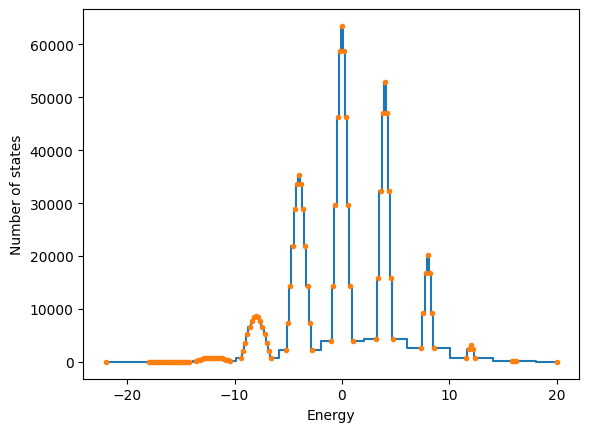

Z = 1569505.5918326946 via DOS
Z = 1569505.5918326934 by definition


In [ ]:
# Найдем плотность состояний перебором всех состояний.
model = Ising(J=1.0, muh=0.1, L=20)
all_energies = np.sort( model.energy(model.all_states()) ) # Массив всех возможных значений энергии.
# plt.plot(all_energies,','); plt.show()
# Группируем одинаковые элементы и считаем их количество
from collections import Counter
density_of_states = Counter(all_energies)
# Извлекаем из счетчика отдельно массив энергию, отдельно число состояний для данной энергии.
energy, number_of_states = np.array(list(density_of_states.items())).T
# Строим график плотности состояний.
plt.step(energy, number_of_states, '-', where='mid',)
plt.plot(energy, number_of_states, '.')
plt.xlabel("Energy")
plt.ylabel("Number of states")
plt.show()
# Имея распределение состояний по энергиям сосчитаем стат. сумму.
beta = .2
Z_dos = np.sum(number_of_states*np.exp(-beta*energy))
Z_exp = partition_function_expl(model, beta) # стат. сумма через определение для сравнения
print(f"Z = {Z_dos} via DOS")
print(f"Z = {Z_exp} by definition")

Алгоритм Ванга-Ландау (ВЛ) последовательно приближает плотность состояний $g(E)$ и является одним из эффективных способов ее оценивания.
Алгоритм стартует со случайного состояния $s^0$ и некоторого приближения (чаще константного) для плотности состояний.
На каждом шаге алгоритма строится новое случайное состояние $s^n$, которое принимается со вероятностью
$P=\min(1,\frac{ g(E(s^{n-1})) }{ g(E(s^{n})) })$.
Приближение плотности состояний обновляется на каждом шаге по формуле
$g(E(s^n))\mapsto g(E(s^n))\cdot f$, где $f>1$ некий множитель.
Для увеличения точности множитель $f$ время от времени тоже обновляется $f\mapsto\sqrt{f}$.
Есть несколько законов для обновления $f$, чаще всего момент обновления определяется по достаточной равномерности гистограммы энергии посещенных состояний.
На практике удобнее хранить логарифм плотности $S(E)=\ln g(E)$, чтобы избежать переполнения.

Подробное обсуждение алгоритма Ванга-Ландау можно найти в статье [arXiv:1808.09251](https://arxiv.org/pdf/1808.09251.pdf).

In [ ]:
from collections import defaultdict
# Простая реализация алгоритма Ванга-Ландау (число состояний считается для каждой энергии, без объединения в группы).
def WangLandauAlgorithm(model:Ising, nsamples=None):
    H = defaultdict(lambda: 0) # Хранилище для гистограммы.
    g = defaultdict(lambda: 1.) # Хранилище для плотности состояний
    f = 1.4 # Множитель для обновления числа состояний.
    state = model.random_states_uni(1) # Начальное состояние
    energy = model.energy(state)[0] # Энергия текущего состояния
    H[energy] = H[energy] + 1
    g[energy] = g[energy] * f
    rejected = 0
    for it in range(nsamples): # Делаем заданное число итераций.
        # Генерируем новое состояние
        candidate = model.random_states_uni(1) # Новое состояние.

        # Обычно новое состояние генерируется небольшим возмущением старого состояний `state`,
        # так как в этом случае энергия меняется плавнее, и время пересчета энергии меньше.
        # Например, это можно было делать так:
#         candidate = state.copy()
#         candidate[0, np.random.randint(model.L)] *= -1
        # Затем на нужно было бы реализовать функцию обновления энергия, учитывая изменение лишь одного спина.

        candidate_energy = model.energy(candidate)[0] # Считаем энергию нового состояния.
        p = np.minimum(1., g[energy]/g[candidate_energy]) # Вероятность принятия состояния.
        if np.random.random()<=p: #  Если состояние принято,
            state = candidate # обновляем состояние.
            energy = candidate_energy
        else:
            rejected += 1
        H[energy] = H[energy] + 1
        g[energy] = g[energy] * f
        # Проверяем возможность обновления шага `f`.
        vals=np.array(list(H.values()))
        std, mean = np.std(vals), np.mean(vals)
        if len(vals)>10 and std/mean<0.25:
            print(f"Restart {it = }: {f = }")
            f = np.sqrt(f) # Уменьшаем шаг.
            H = defaultdict(lambda:0) # Обнуляем накопленные значения.
    print(f"Rejected states {rejected}/{nsamples}")
    # Перенормируем энтропию.
    g_sum = np.sum(list(g.values()))
    total_count_elements = 2**model.L
    return { k: total_count_elements*s/g_sum for k,s in g.items() }

In [ ]:
# Алгоритма Ванга-Ландау с группировкой энергий по группам.
def WangLandauAlgorithmBins(model:Ising, nsamples=None, nbins=None):
    # Максимальная возможная энергия.
    maxE = model.L*(model.J+model.muh)
    # Наименьшая возможная энергия.
    minE = -maxE
    def find_bin(e): # Находит столбец гистрограммы, в который попадает энергия.
        return int(np.round((e-minE)/(maxE-minE)*nbins))
    H = np.zeros(nbins) # Хранилище для гистограммы.
    g = np.ones(nbins) # Хранилище для плотности состояний
    f = 1.4 # Множитель для обновления числа состояний.
    state = model.random_states_uni(1) # Начальное состояние
    energy = model.energy(state)[0] # Энергия текущего состояния
    energy_bin = find_bin(energy)
    H[energy_bin] += 1
    g[energy_bin] *= f
    rejected = 0
    for it in range(nsamples): # Делаем заданное число итераций.
        # Генерируем новое состояние
        candidate = model.random_states_uni(1) # Новое состояние.

        # Обычно новое состояние генерируется небольшим возмущением старого состояний `state`,
        # так как в этом случае энергия меняется плавнее, и время пересчета энергии меньше.
        # Например, это можно было делать так:
#         candidate = state.copy()
#         candidate[0, np.random.randint(model.L)] *= -1
        # Затем на нужно было бы реализовать функцию обновления энергия, учитывая изменение лишь одного спина.

        candidate_energy = model.energy(candidate)[0] # Считаем энергию нового состояния.
        candidate_bin = find_bin(candidate_energy)
        p = g[energy_bin]/g[candidate_bin] if g[candidate_bin]>g[energy_bin] else 1. # Вероятность принятия состояния.
        if np.random.random()<=p: #  Если состояние принято,
            state = candidate # обновляем состояние.
            energy = candidate_energy
            energy_bin = candidate_bin
        else:
            rejected += 1
        H[energy_bin] += 1
        g[energy_bin] *= f
        # Проверяем возможность обновления шага `f`.
        std, mean = np.std(H), np.mean(H)
        if mean>10 and std<0.25*mean:
            print(f"Restart {it = }: {f = }")
            f = np.sqrt(f) # Уменьшаем шаг.
            H[:] = 0 # Обнуляем гистограмму.
    print(f"Rejected states {rejected}/{nsamples}")
    # Перенормируем  число состояний.
    g_sum = np.sum(g)
    total_count_elements = 2**model.L
    return np.linspace(minE, maxE, nbins), total_count_elements/g_sum*g

## Задания:

### 16. Убедитесь, что ваш код хорошо структуирован, в частности: (a) одни и те же действия не выполняются в разных частях кода; (б) все вычисления разбиты на функции, каждая из которых имеет четкое и понятное предназначение и легко читается; (с) все параметры указаны явно, каждый параметр задается ровно в одном месте.

Ising(J=1.0, muh=0.1, L=100)

CPU times: user 8.48 s, sys: 32.1 ms, total: 8.52 s
Wall time: 8.51 s


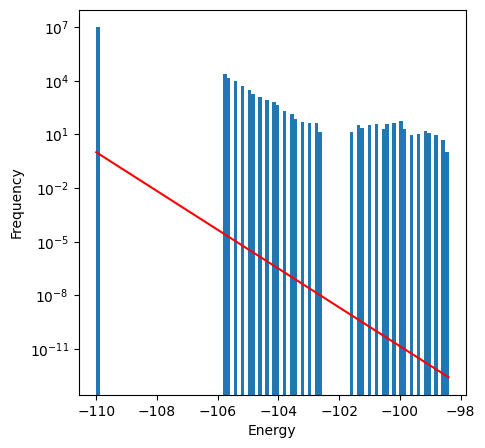

In [ ]:
# Быстрая реализация алгоритма Метрополиса-Гастингса с использованием numba.
import numba as nb

# return -model.J*np.sum(state*np.roll(state, 1, axis=-1), axis=-1)-model.muh*np.sum(state, axis=-1)

@nb.njit('f4(i1[:],i4,f4,f4)')
def energy_variation_by_flip(state, spin, J, muh):
    n = state.shape[0]
    a, b, c = state[(spin-1)%n], state[spin%n], state[(spin+1)%n]
    # e0 = -J*(a*b+b*c)-muh*b
    # e1 = -J*(a*(-b)+(-b)*c)-muh*(-b)
    de = 2*(J*(a+c)+muh)*b  # e1-e0
    return de

@nb.njit('f4[:](i1[:],i4,i4,f4,f4,f4)')
def metropolis(state, nsamples, pause, J, muh, kBT):
    N = state.shape[0]
    samples = np.empty(nsamples, dtype=np.float32)
    # Compute initial energy.
    eJ, eh = 0., 0.
    for n in range(N-1):
        eJ += state[n]*state[n+1]
        eh += state[n]
    eJ += state[0]*state[N-1]
    eh += state[N-1]
    samples[0] = e = -J*eJ-muh*eh
    # Run simulation.
    for n in range(1,nsamples):
        for k in range(pause):
            # Find a candidate for flip.
            q = np.random.randint(N)
            # Energy variation by the swap.
            de = energy_variation_by_flip(state, q, J, muh)
            # Acceptance rate
            alpha = np.exp(-de/kBT)
            # Test transition.
            u = np.random.random()
            if u<=alpha: # Accept.
                state[q] *= -1
                e += de
        samples[n] = e
    return samples

model = Ising(J=1.0, muh=0.1, L=100)
display(model)
state = model.random_states_uni(1).flatten()
kBT = 0.4
%time samples = metropolis(state, 10000000, 10, model.J, model.muh, kBT)
samples = samples[10000:]

e_min = np.min(samples)
e_range = np.linspace(e_min, np.max(samples), 100)
prediction = np.exp(-(e_range-e_min)/kBT)

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(samples[1000:], bins=100, log=True)
ax.plot(e_range, prediction, '-r')
ax.set_xlabel("Energy")
ax.set_ylabel("Frequency")
plt.show()